## FIAP - Atividade F3A4 - Grupo 61

> Esse projeto é parte do curso de **Inteligência Artificial** da [FIAP](https://github.com/fiap) - Online 2024. Este notebook é a atividade "**Fase 3** Atividade Cap. 14 - A primeira técnica de aprendizado de máquina."

## Objetivos

1. Desenvolver análise exploratória dos dados
2. Desenvolver análise descritiva dos dados
3. Responder ao seguinte questionamento: `Encontrar o “perfil ideal” de solo/clima para as plantações, além de discorrer sobre como os três produtos distintos (à escolha do grupo) se comparam com esse perfil ideal. Por exemplo, preferem maior umidade e mais precipitação? Preferem mais calor e menos fósforo? Para esta parte se apoie em análises estatísticas e/ou visuais;`
4. Desenvolver modelos preditivos de classificação para os dados

## Integrantes


## Professores

- Tutor: <a href="https://www.linkedin.com/in/lucas-gomes-moreira-15a8452a/">Lucas Gomes Moreira</a>
- Coordenador: <a href="https://www.linkedin.com/in/profandregodoi/">André Godoi</a>
din.com/in/lucas-gomes-moreira-15a8452a/">Lucas Gomes Moreira</a>
- Coordenador: <a href="https://www.linkedin.com/in/profandregodoi/">André Godoi</a>

---

## Sumário

1. Introdução
2. Visão Geral do Projeto
3. Análise Exploratória de Dados
4. Análise Descritiva
5. Machine Learning
6. Conclusão

---

## 1. Introdução

### 1.1. Escopo do Projeto

#### 1.1.1. Contexto da Inteligência Artificial
A Inteligência Artificial (IA) desempenha um papel fundamental na agricultura moderna, onde o uso de algoritmos avançados pode otimizar a produção, monitorar as condições de plantio e prever os melhores cenários de cultivo. A IA permite uma análise mais eficiente dos fatores climáticos e do solo que afetam a produtividade agrícola. Neste projeto, aplicamos aprendizado de máquina para classificar culturas agrícolas com base em dados de solo e clima, promovendo uma agricultura de precisão que melhora a tomada de decisões e reduz desperdícios de recursos.

#### 1.1.2. Descrição da Solução Desenvolvida
O projeto utiliza aprendizado supervisionado para desenvolver um modelo preditivo que classifica culturas agrícolas com base em variáveis como umidade, temperatura, pH do solo e concentrações de nutrientes (N, P, K). Utilizando dados reais, o modelo foi treinado e testado para identificar o 'perfil ideal' de solo/clima para cada cultura, com o objetivo de auxiliar produtores a planejar o plantio de maneira mais eficiente. As análises exploratórias e descritivas incluíram diversas visualizações e métodos de limpeza de dados para garantir uma base sólida para o treinamento do modelo.

## 2. Visão Geral do Projeto

### 2.1. Público-Alvo
O público-alvo inclui agricultores, agrônomos, empresas agroindustriais e pesquisadores interessados em maximizar a produtividade e eficiência das culturas através da aplicação de tecnologias inteligentes.

### 2.2. Metodologia
A metodologia aplicada no desenvolvimento deste projeto foi dividida em etapas, começando com uma Análise Exploratória dos Dados (EDA), seguida de uma análise descritiva e da aplicação de técnicas de aprendizado de máquina supervisionado. Diversos algoritmos, como Decision Tree, Random Forest, Logistic Regression, KNN e SVM foram testados, com a finalidade de encontrar o melhor modelo para a classificação das culturas.

## Preparação do Ambiente

In [1]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Set the dark theme for plots
plt.style.use('dark_background')

In [3]:
# Dangerously set warnings off (Just for better visualization)
import warnings
warnings.filterwarnings('ignore')

## Coleta de Dados

In [4]:
# Load dataset
df = pd.read_csv('./dataset.csv')
df.sample(5)

N   P   K  temperature   humidity        ph    rainfall        label
2078  71  56  37    23.188667  86.208997  6.491506  176.103677         jute
372   11  61  21    18.623288  23.024103  5.532101  135.337803  kidneybeans
335   33  59  22    22.642369  21.593961  5.947000  122.388601  kidneybeans
713   55  66  22    30.912195  68.794274  7.747775   66.638306    blackgram
1854  39  29  29    26.509086  94.484145  6.143663  199.877840      coconut

## 3. Análise Exploratória de Dados

### 3.1. Compreensão dos dados

#### 3.1.1. Visualização em tabela dos dados

In [5]:
print("Quantidade de linhas: ", df.shape[0])
print("Quantidade de colunas: ", df.shape[1])

# Display 5 random samples from the dataset
df.sample(5)

Quantidade de linhas:  2200
Quantidade de colunas:  8


N    P    K  temperature   humidity        ph    rainfall        label
973    8   23   38    19.301063  87.177517  7.005411  105.476659  pomegranate
1590  35  131  203    22.427761  93.917224  5.893491  102.723074        apple
295   57   56   78    17.341502  18.756263  8.861480   67.954543     chickpea
76    67   47   44    26.730724  81.785968  7.868475  280.404439         rice
1236   3  134  199    20.283702  81.322357  5.817178   71.066112       grapes

#### 3.1.2. Entendendo os dados

**Variáveis numéricas discretas**
- N: concentração de potássio (unidade não informada)
- P: concentração de fósforo (unidade não informada)
- K: concentração de potássio (unidade não informada)

**Variáveis numéricas contínuas**
- temperature: temperatura (ºC)
- humidity: umidade (%)
- ph: PH do solo
- rainfall: quantidade de precipitação (mm)

**Variaveis categóricas**
- label: cultura agrícola


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### 3.1.3. Visualizando as classes (Culturas agrícolas) 

- Culturas agrícolas disponíveis: rice (arroz), maize (milho), chickpea (grão-de-bico), kidneybeans (feijão), pigeonpeas (ervilhas), mothbeans (feijão-moth), mungbean (feijão-mungo), blackgram (feijão-preto), lentil (lentilha), pomegranate (romã), banana (banana), mango (manga), grapes (uvas), watermelon (melancia), muskmelon (melão), apple (maçã), orange (laranja), papaya (papaia), coconut (coco), cotton (algodão), jute (juta), coffee (café)
- Total de culturas agrícolas: 22
- Cada cultura agrícola possui 100 registros
- Total de registros: 2200

In [7]:
# Contagem dos valores para cada classe
classes = df['label'].value_counts()
classes


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

#### 3.1.4. Análise de Inconsistências

**Investigação de outliers**

Cada cultura agrícola é cultivada em diferentes condições de solo, temperatura, umidade, pH e precipitação. Portanto, não faz sentido considerar outliers nos dados entre culturas diferentes. Ela deve por outro lado ser feita para cada cultura agrícola individualmente.

**Método de detecção de outliers**

É utilizado o método do `z_score` para detectar outliers. Cálculo do z_score:

`z = (X - μ) / σ`
- X é o valor da amostra
- μ é a média da população
- σ é o desvio padrão da população

O `z_score` é uma medida de quantos desvios padrão um ponto de dados está longe da média. Se o `z_score` de um ponto de dados for maior que 2, consideramos o ponto como um outlier.

Consideremos a população como sendo dados de cada coluna para cada cultura agrícola.

**Outlivers encontrados**
- Apenas 2 pontos outliers encontrados: para a cultura agrícola 'apple' (maçã) na variável 'ph'
  
**Conclusão**
- Os dados não contém quantidade significativa de outliers, sendo assim não foi necessário a correção de inconsistências.
- Remoção de duplicatas são não-aplicáveis, já que é possível dois valores iguais de fato.

In [8]:
feature_columns = df.select_dtypes(include=[float, int]).columns

for crop in df['label'].unique():
    print(f"Outliers para a classe {crop}")
    z_scores = df[df['label'] == crop][feature_columns].apply(zscore)
    outliers = (z_scores.abs() > 2).sum()
    
    if len(outliers[outliers > 0]) == 0:
        print("Nenhum outlier encontrado")
        print("\n")
        continue
    
    print(outliers[outliers > 0])
    print("\n")


Outliers para a classe rice
Nenhum outlier encontrado


Outliers para a classe maize
Nenhum outlier encontrado


Outliers para a classe chickpea
Nenhum outlier encontrado


Outliers para a classe kidneybeans
Nenhum outlier encontrado


Outliers para a classe pigeonpeas
Nenhum outlier encontrado


Outliers para a classe mothbeans
Nenhum outlier encontrado


Outliers para a classe mungbean
Nenhum outlier encontrado


Outliers para a classe blackgram
Nenhum outlier encontrado


Outliers para a classe lentil
Nenhum outlier encontrado


Outliers para a classe pomegranate
Nenhum outlier encontrado


Outliers para a classe banana
Nenhum outlier encontrado


Outliers para a classe mango
Nenhum outlier encontrado


Outliers para a classe grapes
Nenhum outlier encontrado


Outliers para a classe watermelon
Nenhum outlier encontrado


Outliers para a classe muskmelon
Nenhum outlier encontrado


Outliers para a classe apple
ph    2
dtype: int64


Outliers para a classe orange
Nenhum outlier encont

**Possíveis consequências dos outliers encontrados**

- **Objetivo**: Vamos mostrar que os 2 outliers encontrados para a cultura agrícola 'apple' (maçã) na variável 'ph' são valores coerentes.

- O print abaixo mostra os valores de 'ph' com maiores z_scores (em valores absolutos) em ordem decrescente.

- Portanto, os 2 primeiros elementos são os outliers.

- Percebemos que o pH deles, cujos valores são 6.499 e 6.496, são valores coerentes para a cultura agrícola 'apple' (maçã).

- **Conclusão**: Não precisamos remover esses valores dos dados.

In [9]:
# Filter z-scores for 'apple' crop
apple_z_scores = df[df['label'] == 'apple'][feature_columns].apply(zscore)

# Find outliers in 'ph' variable
apple_ph_outliers = apple_z_scores[apple_z_scores['ph'].abs() > 2]
# Print the top 10 absolute z-scores for 'apple' crop
top_10_z_scores_indices = apple_z_scores['ph'].abs().sort_values(ascending=False).head(10).index

print("Top 10 absolute z-scores for 'apple' crop with their 'ph' values:")
for idx in top_10_z_scores_indices:
    print(f"Index: {idx}, z_score: {apple_z_scores.loc[idx, 'ph']}, ph value: {df.loc[idx, 'ph']}")

Top 10 absolute z-scores for 'apple' crop with their 'ph' values:
Index: 1508, z_score: 2.128546006234152, ph value: 6.4992268210000015
Index: 1598, z_score: 2.1199792276329554, ph value: 6.496934492
Index: 1537, z_score: 1.919848914297802, ph value: 6.443382913
Index: 1539, z_score: 1.9157618954418458, ph value: 6.442289294
Index: 1558, z_score: 1.7832022651250432, ph value: 6.406818518
Index: 1597, z_score: 1.758920854382436, ph value: 6.400321212000001
Index: 1533, z_score: 1.7054803936806822, ph value: 6.386021424
Index: 1512, z_score: 1.6948625771617147, ph value: 6.3831802710000005
Index: 1570, z_score: 1.630555248753511, ph value: 6.365972687999999
Index: 1573, z_score: -1.5524489277368383, ph value: 5.514253142


#### 3.1.5. Buscando correlações entre as variáveis

- Em termos gerais, as correlações entre as variáveis são baixas (valores absolutos menores que 23.14%)
- A excessão: a correlação entre as variáveis N e K é de 73.62%, considerada elevada.


In [10]:
# Correlation table
corr_df = df.corr(numeric_only=True)
corr_df

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

#### 3.1.6. Estatísticas descritivas básicas das variáveis numéricas

In [11]:
# Summary statistics of the dataset
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#### 3.1.7. Análise de valores nulos

Não há valores nulos nos dados.

In [12]:
# Contar valores nulos por coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 4. Análise Descritiva

### 4.1. Gráficos boxplot de cada variável por cultura agrícola

#### 4.1.1. Boxplot Nitrogênio (N) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de nitrogênio (N) ideal para cada cultura agrícola. 

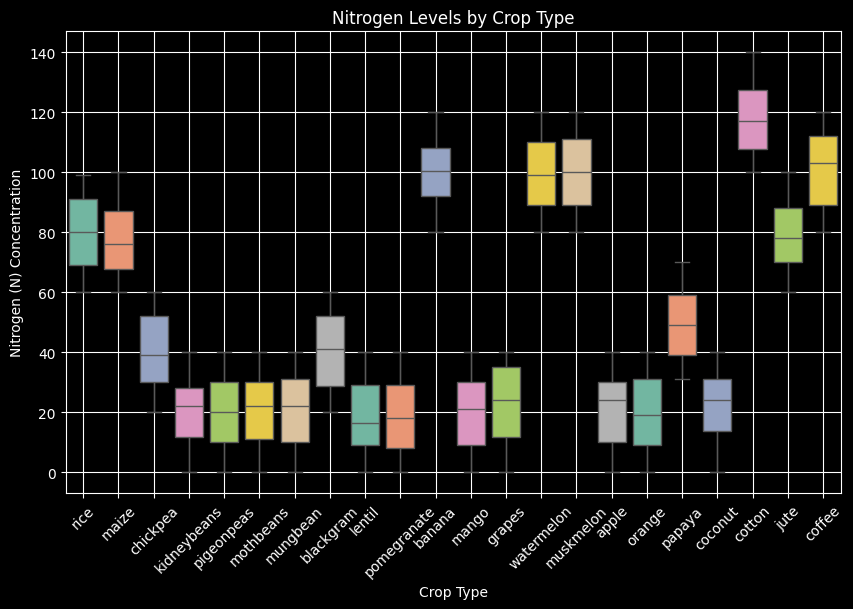

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='N', palette='Set2', legend=False)
plt.title('Nitrogen Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Nitrogen (N) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.2. Boxplot Fósforo (P) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de fósforo (P) ideal para cada cultura agrícola. 

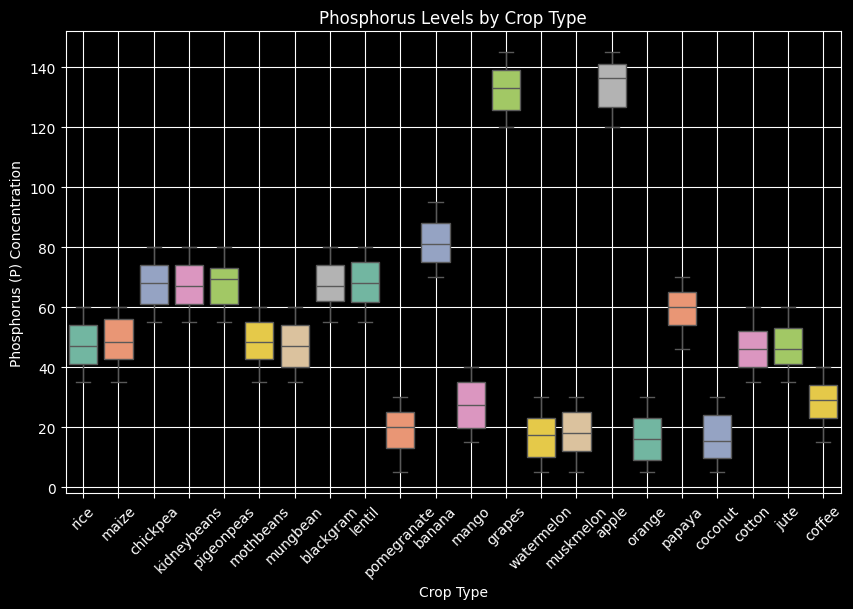

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='P', palette='Set2')
plt.title('Phosphorus Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Phosphorus (P) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.3. Boxplot Potássio (K) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de potássio (K) ideal para cada cultura agrícola. 

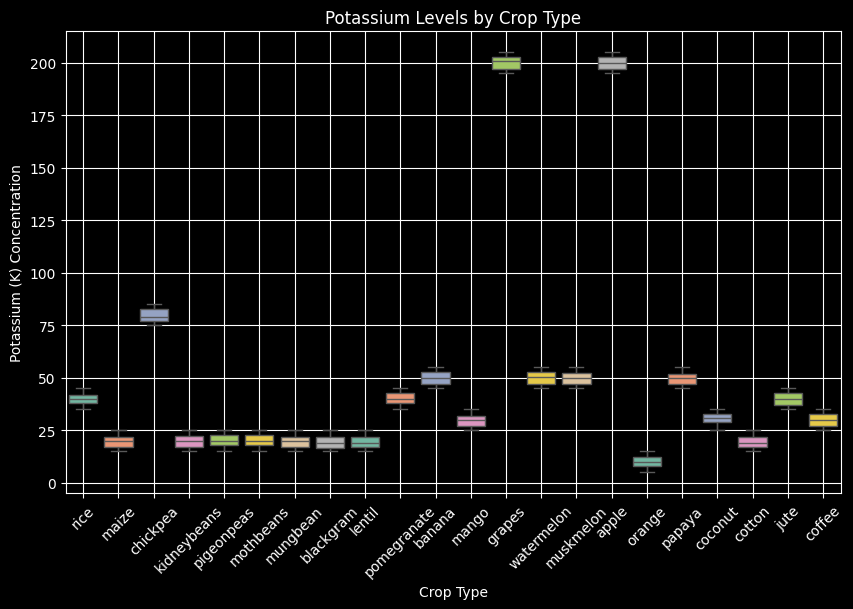

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='K', palette='Set2')
plt.title('Potassium Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Potassium (K) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.4. Boxplot Temperatura por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de temperatura ideal para cada cultura agrícola. 

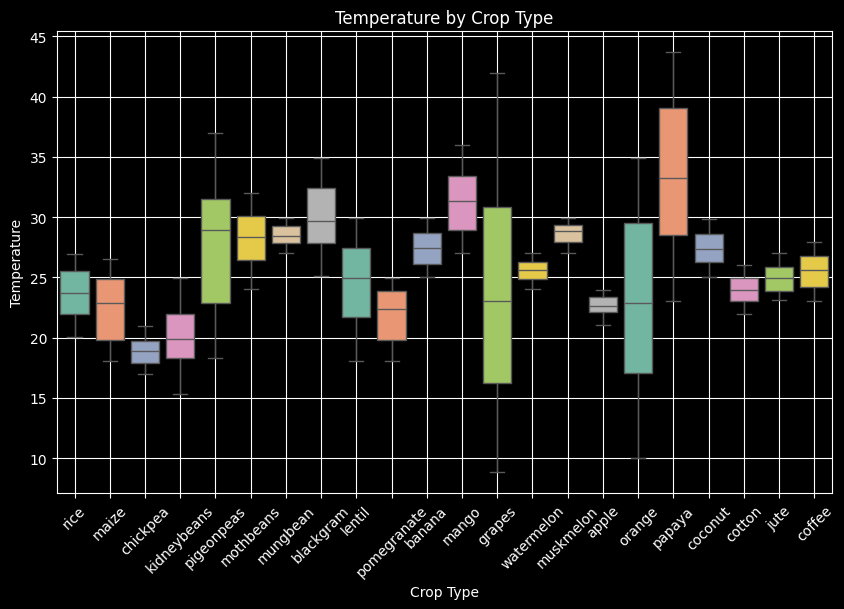

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.5. Boxplot Umidade (%) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de umidade (%) ideal para cada cultura agrícola. 

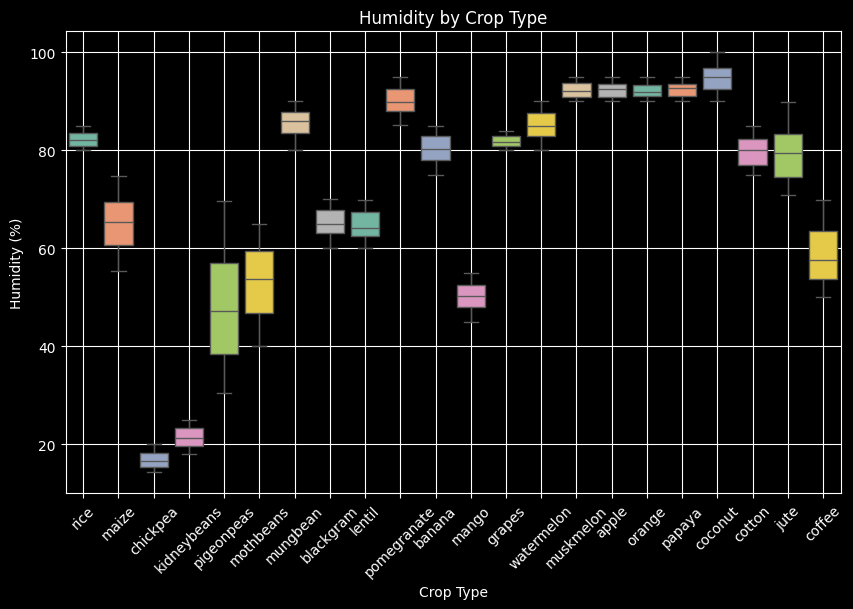

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='humidity', palette='Set2')
plt.title('Humidity by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.6. Boxplot pH por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de pH ideal para cada cultura agrícola. 

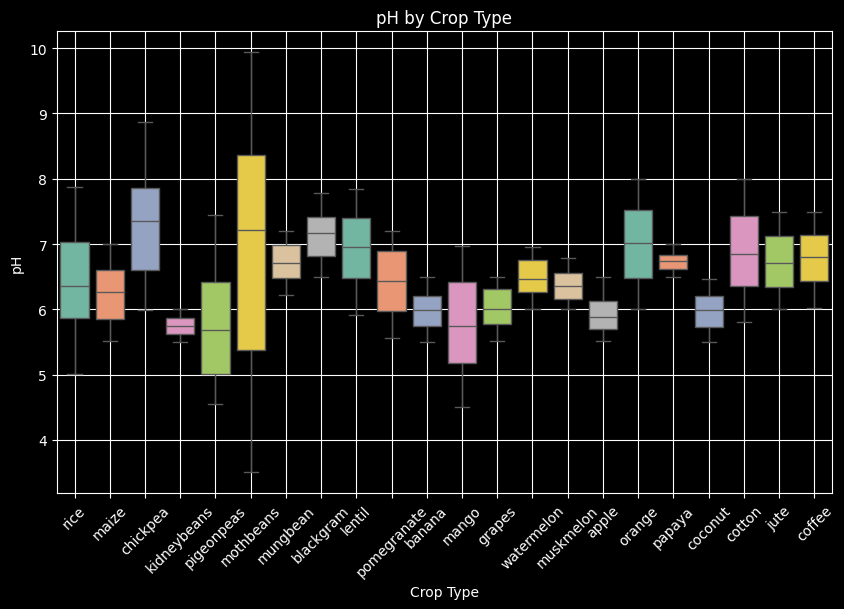

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='ph', palette='Set2')
plt.title('pH by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.1.7. Boxplot quantidade de precipitação por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de quantidade de precipitação ideal para cada cultura agrícola. 

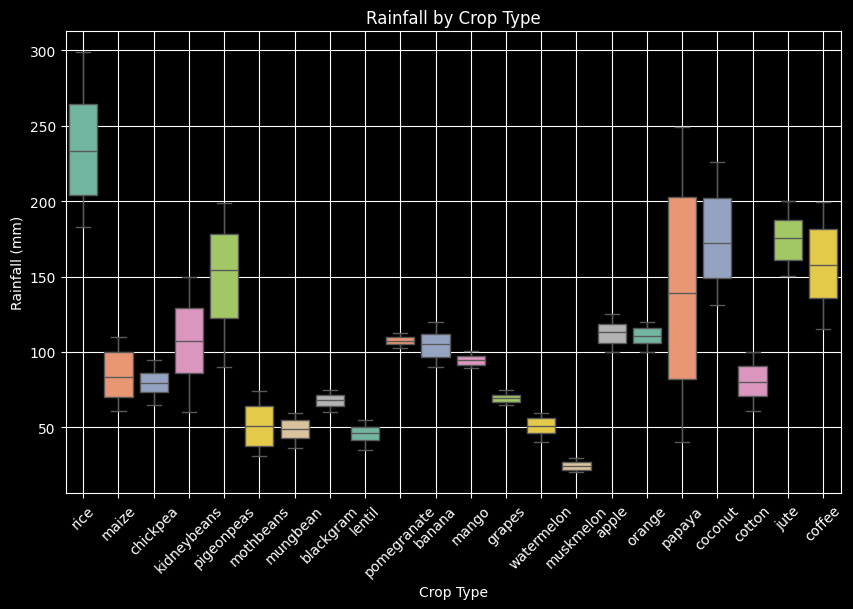

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='rainfall', palette='Set2')
plt.title('Rainfall by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 4.2. Gráficos de barras para média de temperatura e umidade por cultura agrícola

#### 4.2.1. Média de temperatura por cultura agrícola

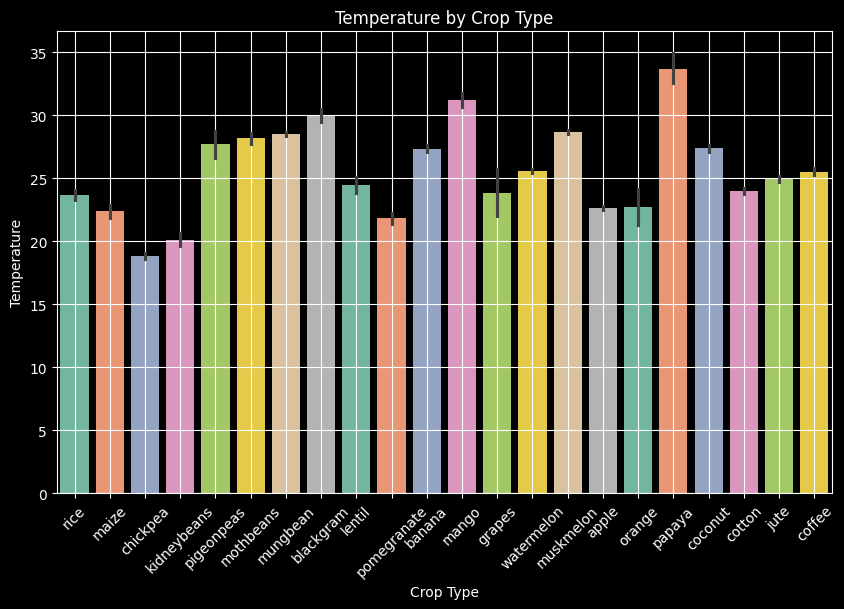

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4.2.2. Média de umidade por cultura agrícola

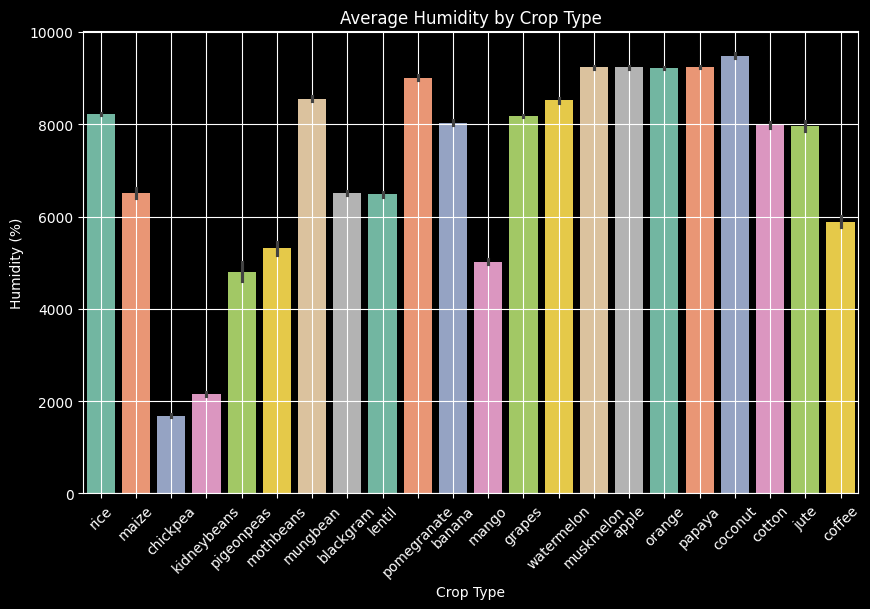

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='humidity', palette='Set2', estimator=sum)
plt.title('Average Humidity by Crop Type')
plt.xticks(rotation=45)
plt.xlabel('Crop Type')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### 4.2.3. Média de precipitação por cultura agrícola

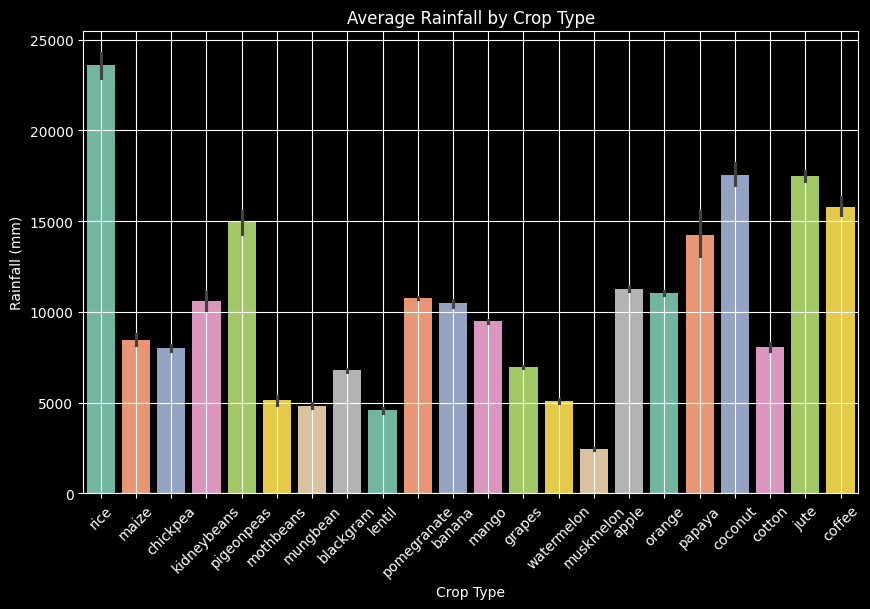

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='rainfall', palette='Set2', estimator=sum)
plt.title('Average Rainfall by Crop Type')
plt.xticks(rotation=45)
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

### 4.3. Gráficos de barras para média de quantidade de precipitação por cultura agrícola

A linha ciano representa a estimativa da Função de Densidade de Probabilidade (PDF) da quantidade de precipitação para cada cultura agrícola.

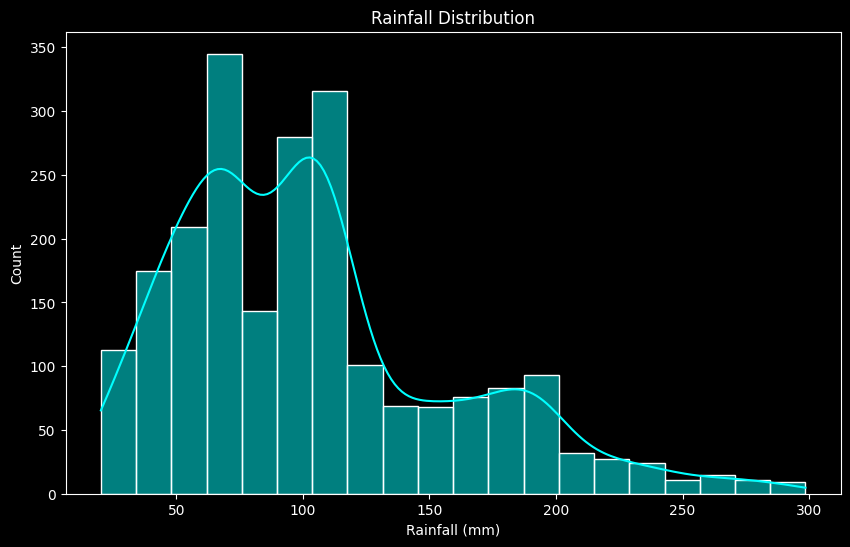

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rainfall'], bins=20, kde=True, color='cyan')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()

### 4.4. Matriz de correlação entre as variáveis numéricas

Escala de cores baseada em calor:
- Azul indica menor correlação (em valores absolutos)
- Vermelho indica maior a correlação (em valores absolutos)

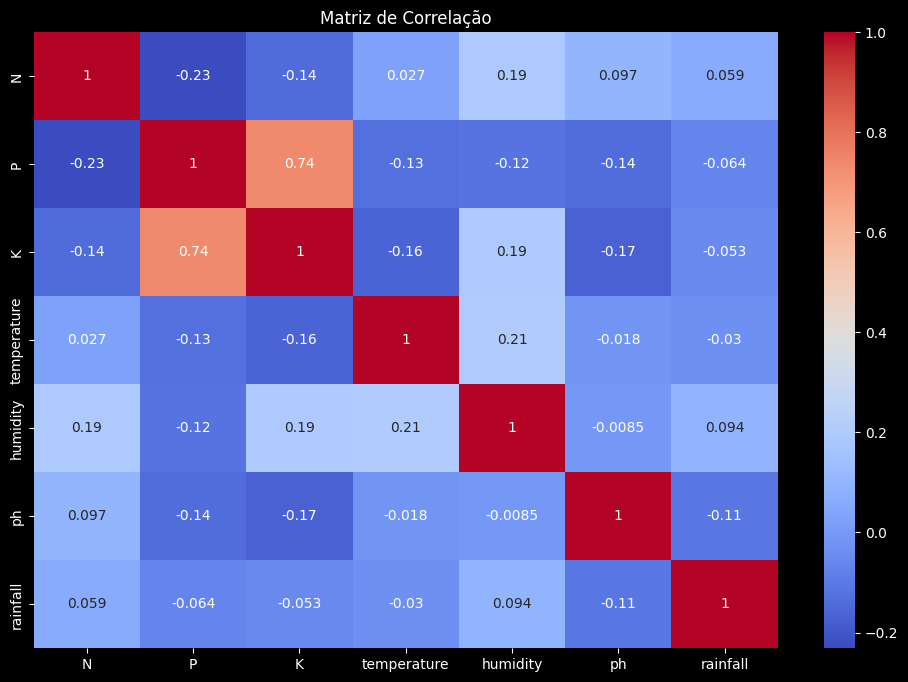

In [24]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

### 4.5. Gráficos de dispersão de temperatura por umidade para cada cultura agrícola

Objetivos:
- Avaliar os intervalos ideais de temperatura e umidade para cada cultura agrícola.
- Responder à pergunta: `Encontrar o “perfil ideal” de solo/clima para as plantações`

A fim de cumprir o objetivo, esta visualização mostra um gráfico para cada cultura e fixa os intevalos dos eixos x e y.
- Eixo x: temperatura fixada entre 0 e 45 ºC
- Eixo y: umidade fixada entre 0 e 100 %

Desta forma, conseguimos visualizar a distribuição dos dados de temperatura e umidade para cada cultura agrícola.

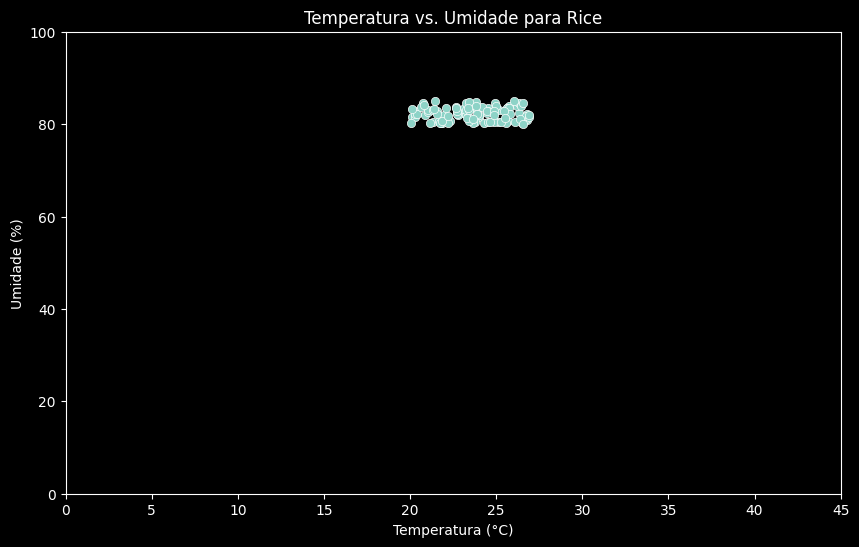

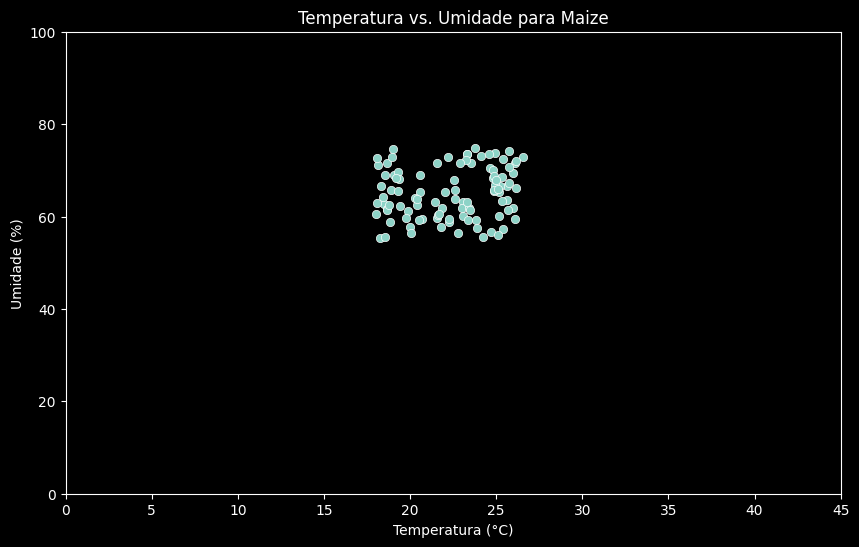

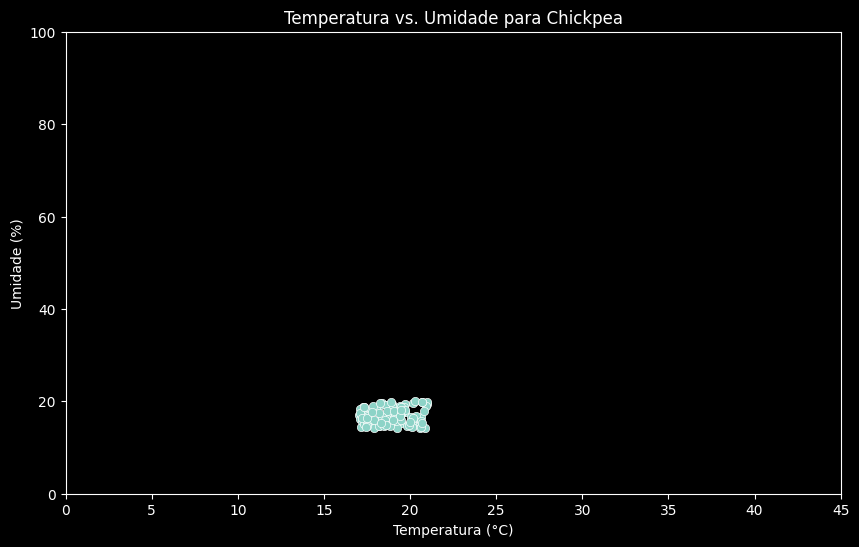

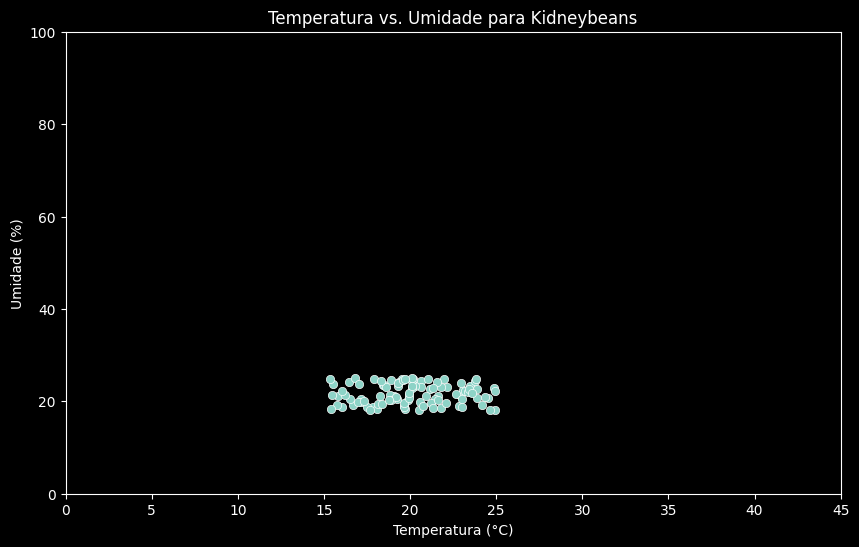

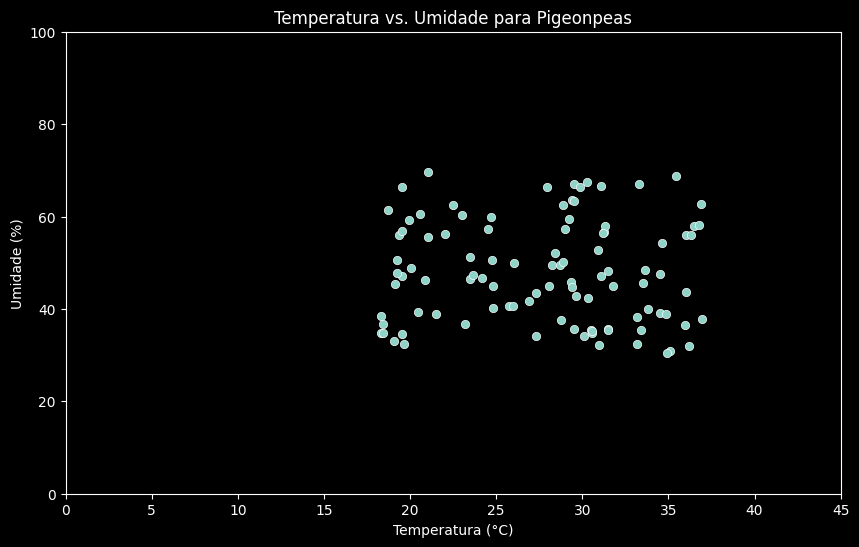

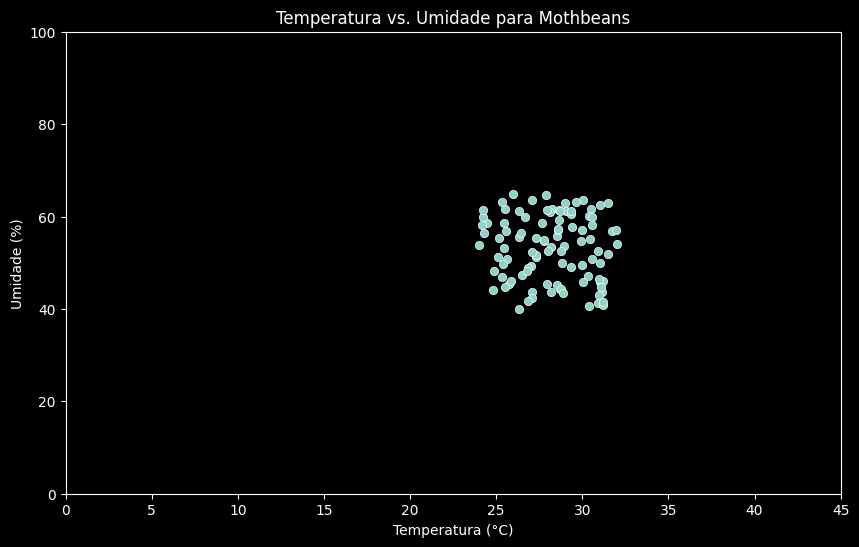

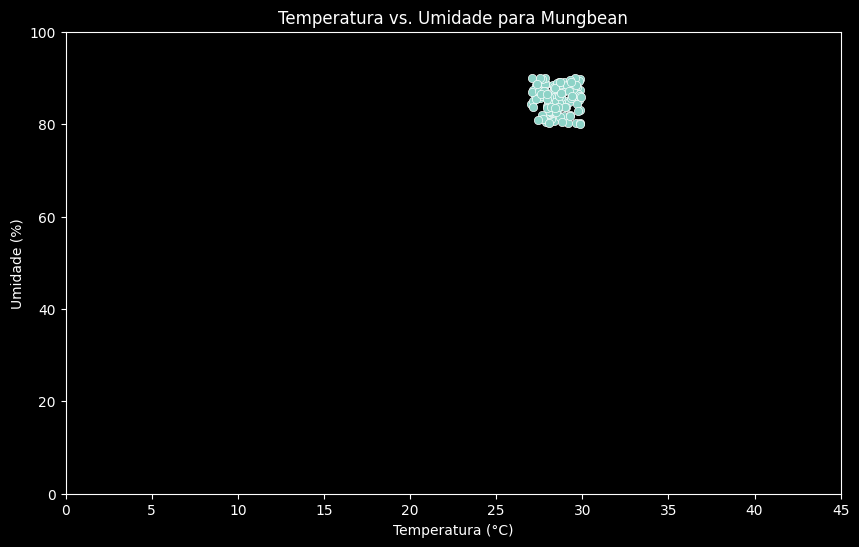

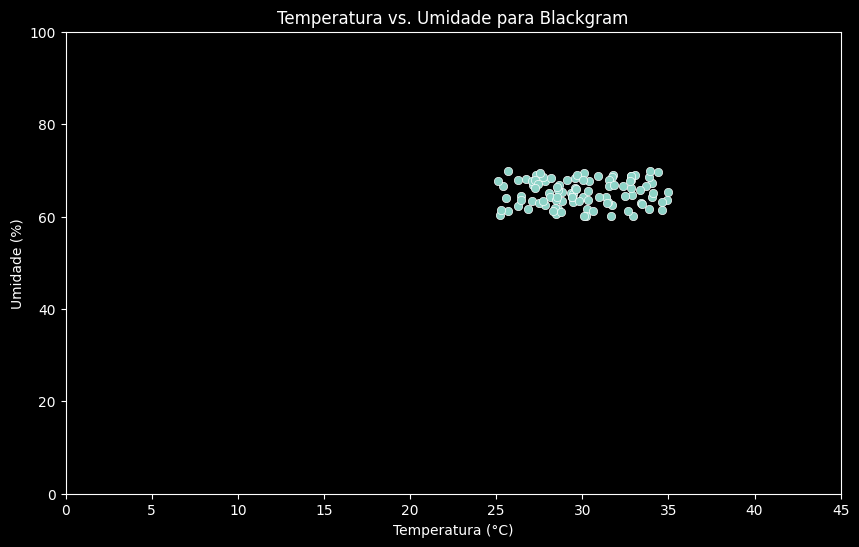

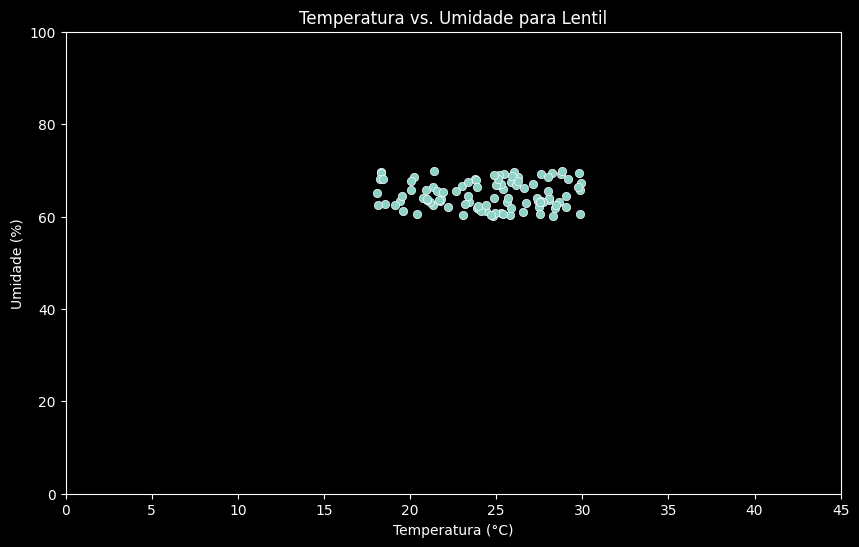

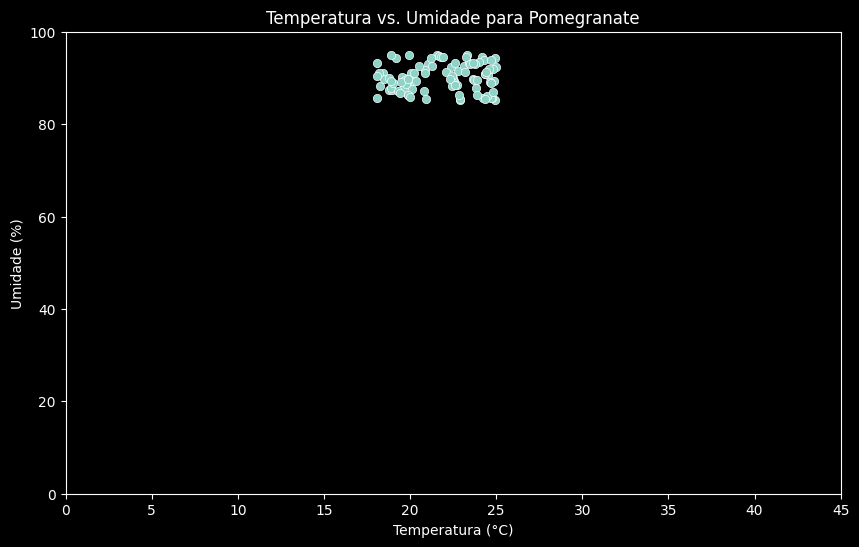

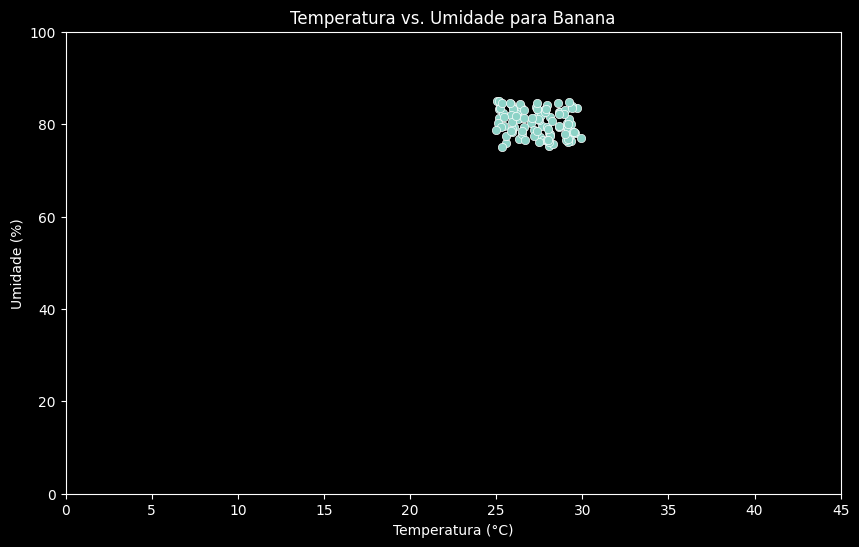

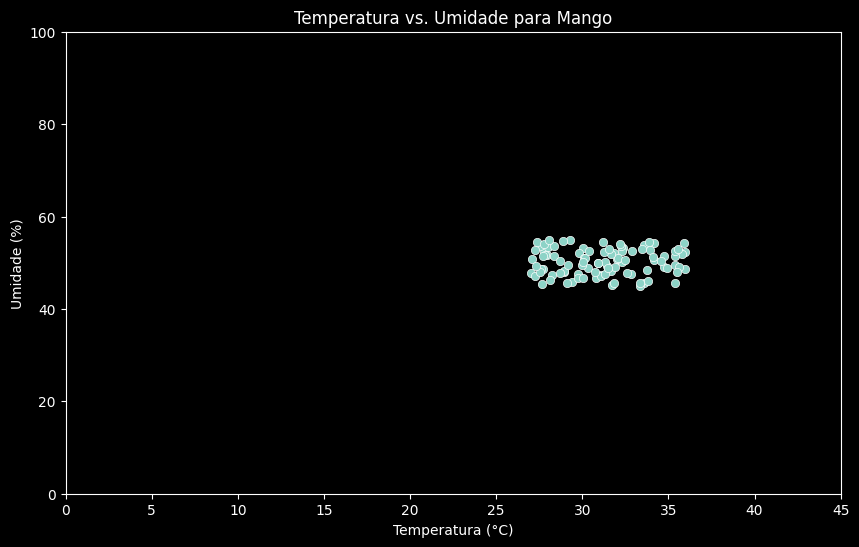

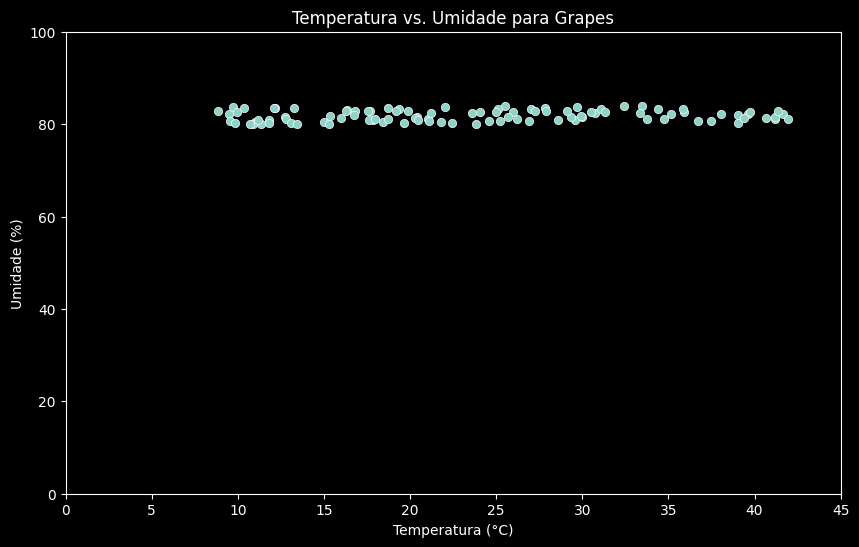

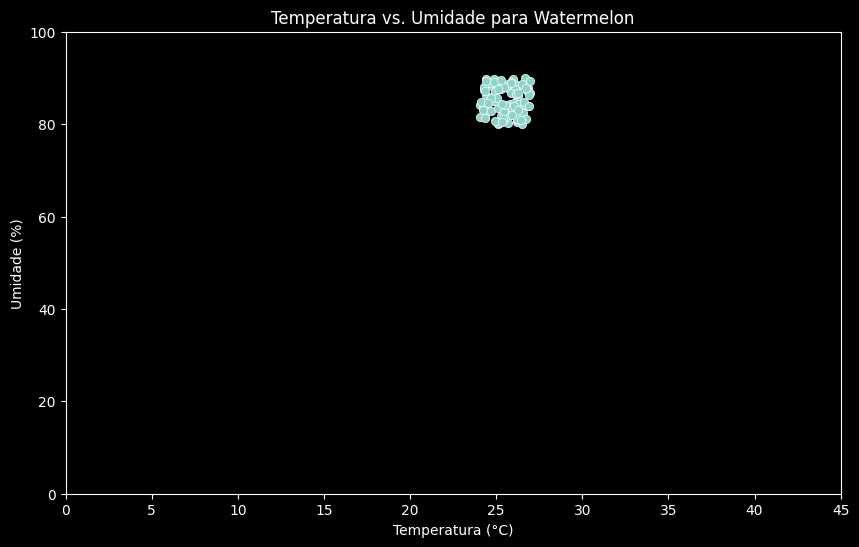

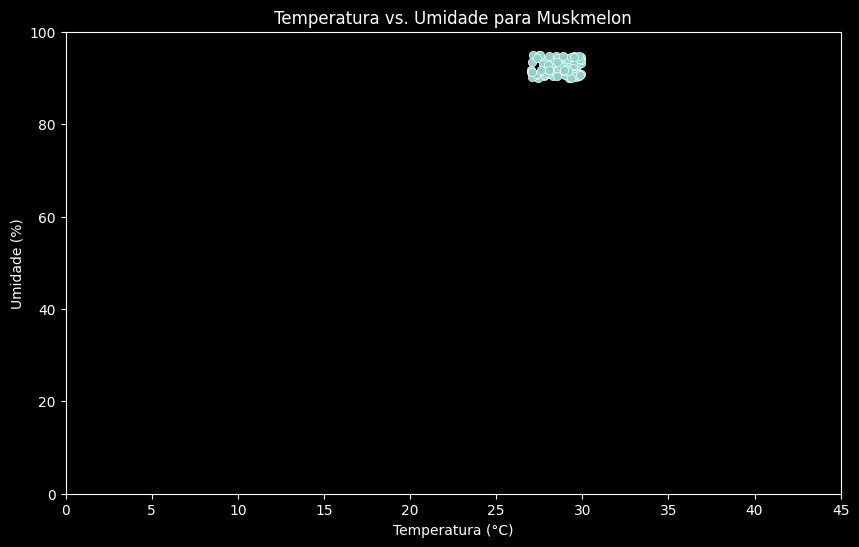

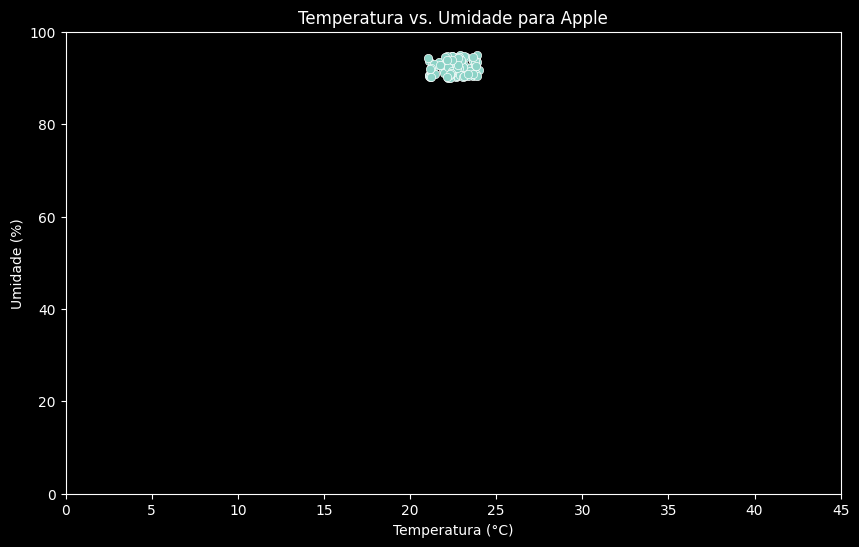

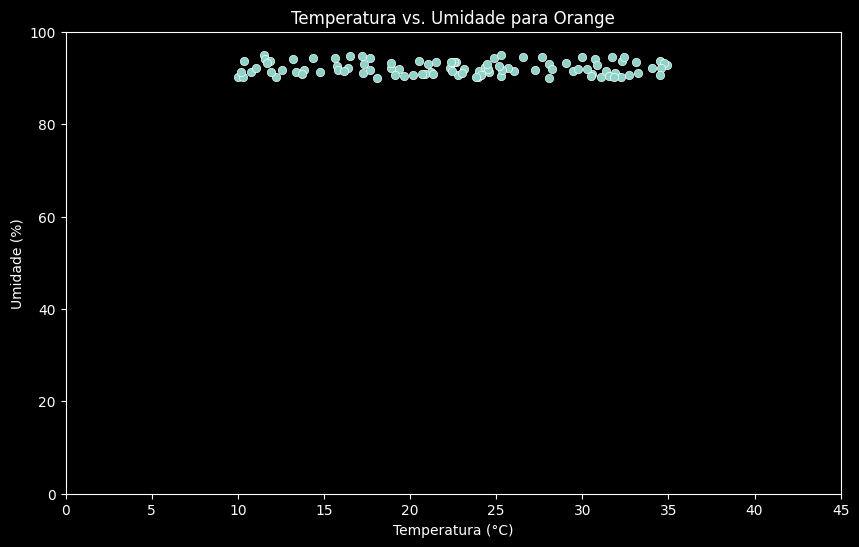

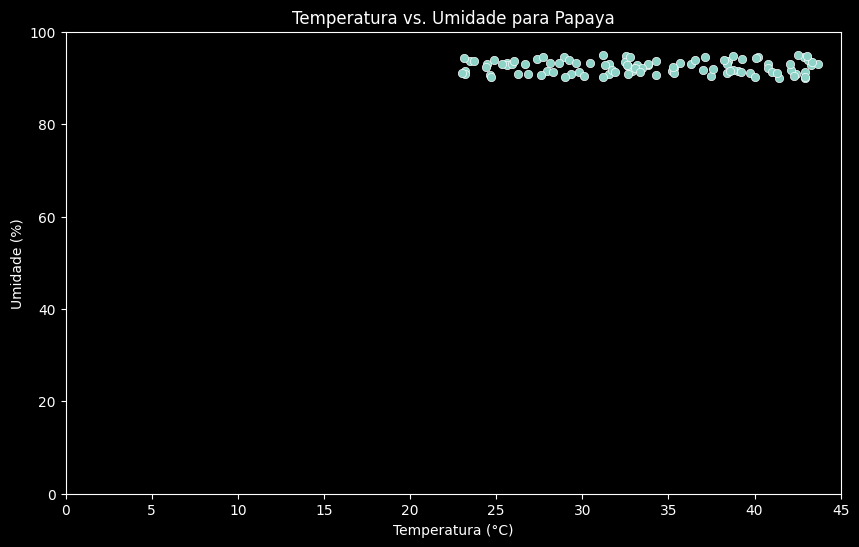

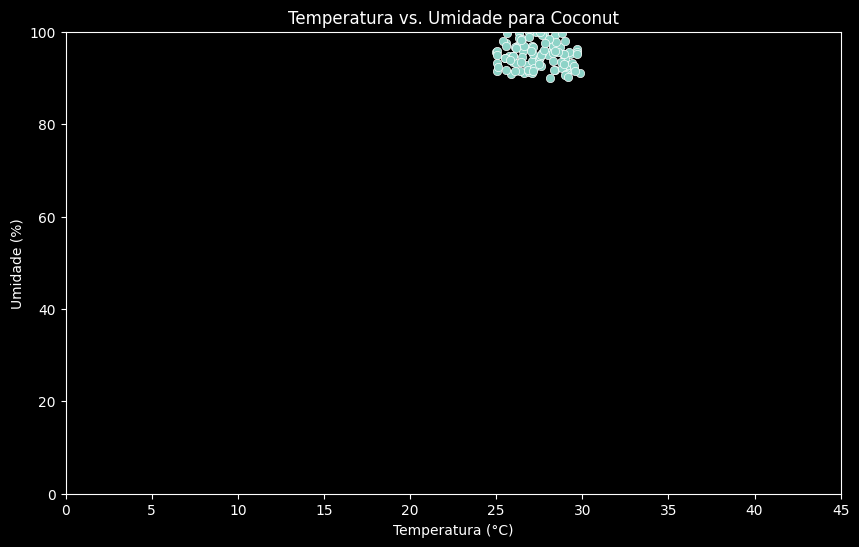

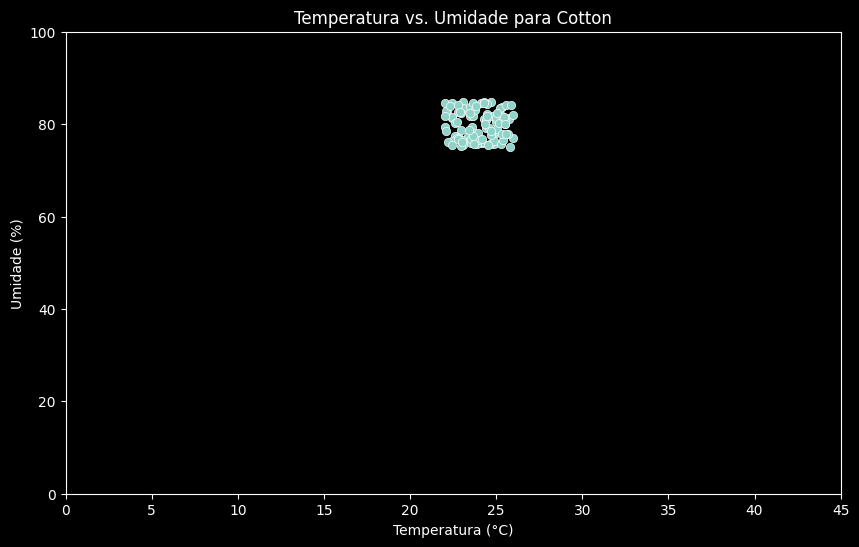

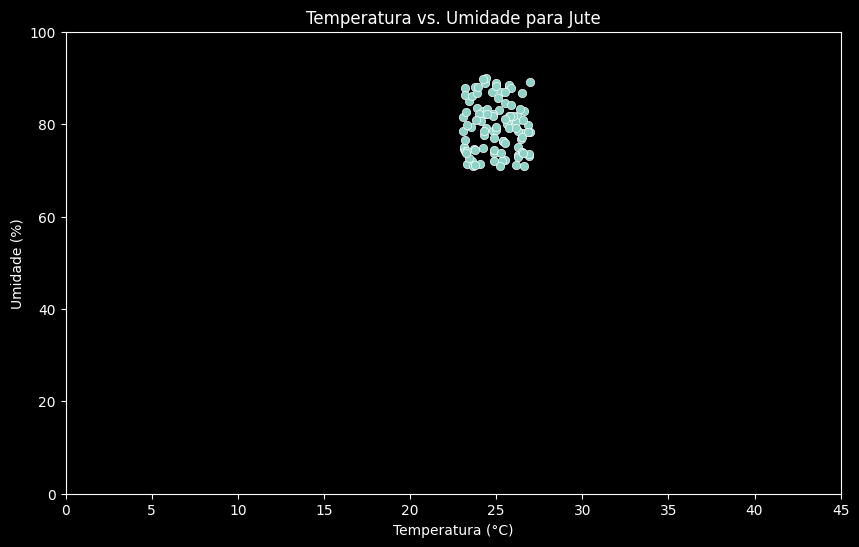

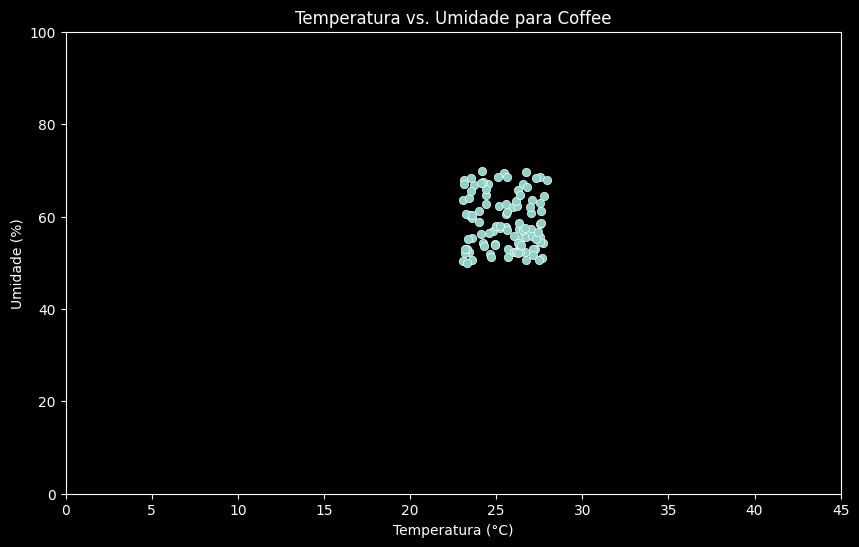

In [25]:
culturas = df['label'].unique()
culturas_selecionadas = ['rice', 'chickpea', 'coffee']

# Definir limites fixos com base nos dados, adicionando uma margem
temp_min_fixed = 00  # Um pouco abaixo do mínimo
temp_max_fixed = 45  # Um pouco acima do máximo
hum_min_fixed = 0   # Um pouco abaixo do mínimo
hum_max_fixed = 100   # Um pouco acima do máximo

# Loop para criar um gráfico para cada cultura
for cultura in culturas:
    data_cultura = df[df['label'] == cultura]

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature', y='humidity', data=data_cultura)
    plt.title(f'Temperatura vs. Umidade para {cultura.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Umidade (%)')
    
    # Definir os limites dos eixos
    plt.xlim(temp_min_fixed, temp_max_fixed)
    plt.ylim(hum_min_fixed, hum_max_fixed)
    
    plt.show()

### 4.6. Gráficos de correlação bi-variadas para cada cultura agrícola

Objetivo:
- Avaliar a relação entre as variáveis para cada cultura agrícola

Obs.: vamos fazer apenas para a cultura agrícola 'coffee' (café) para demonstração.

<Figure size 1000x600 with 0 Axes>

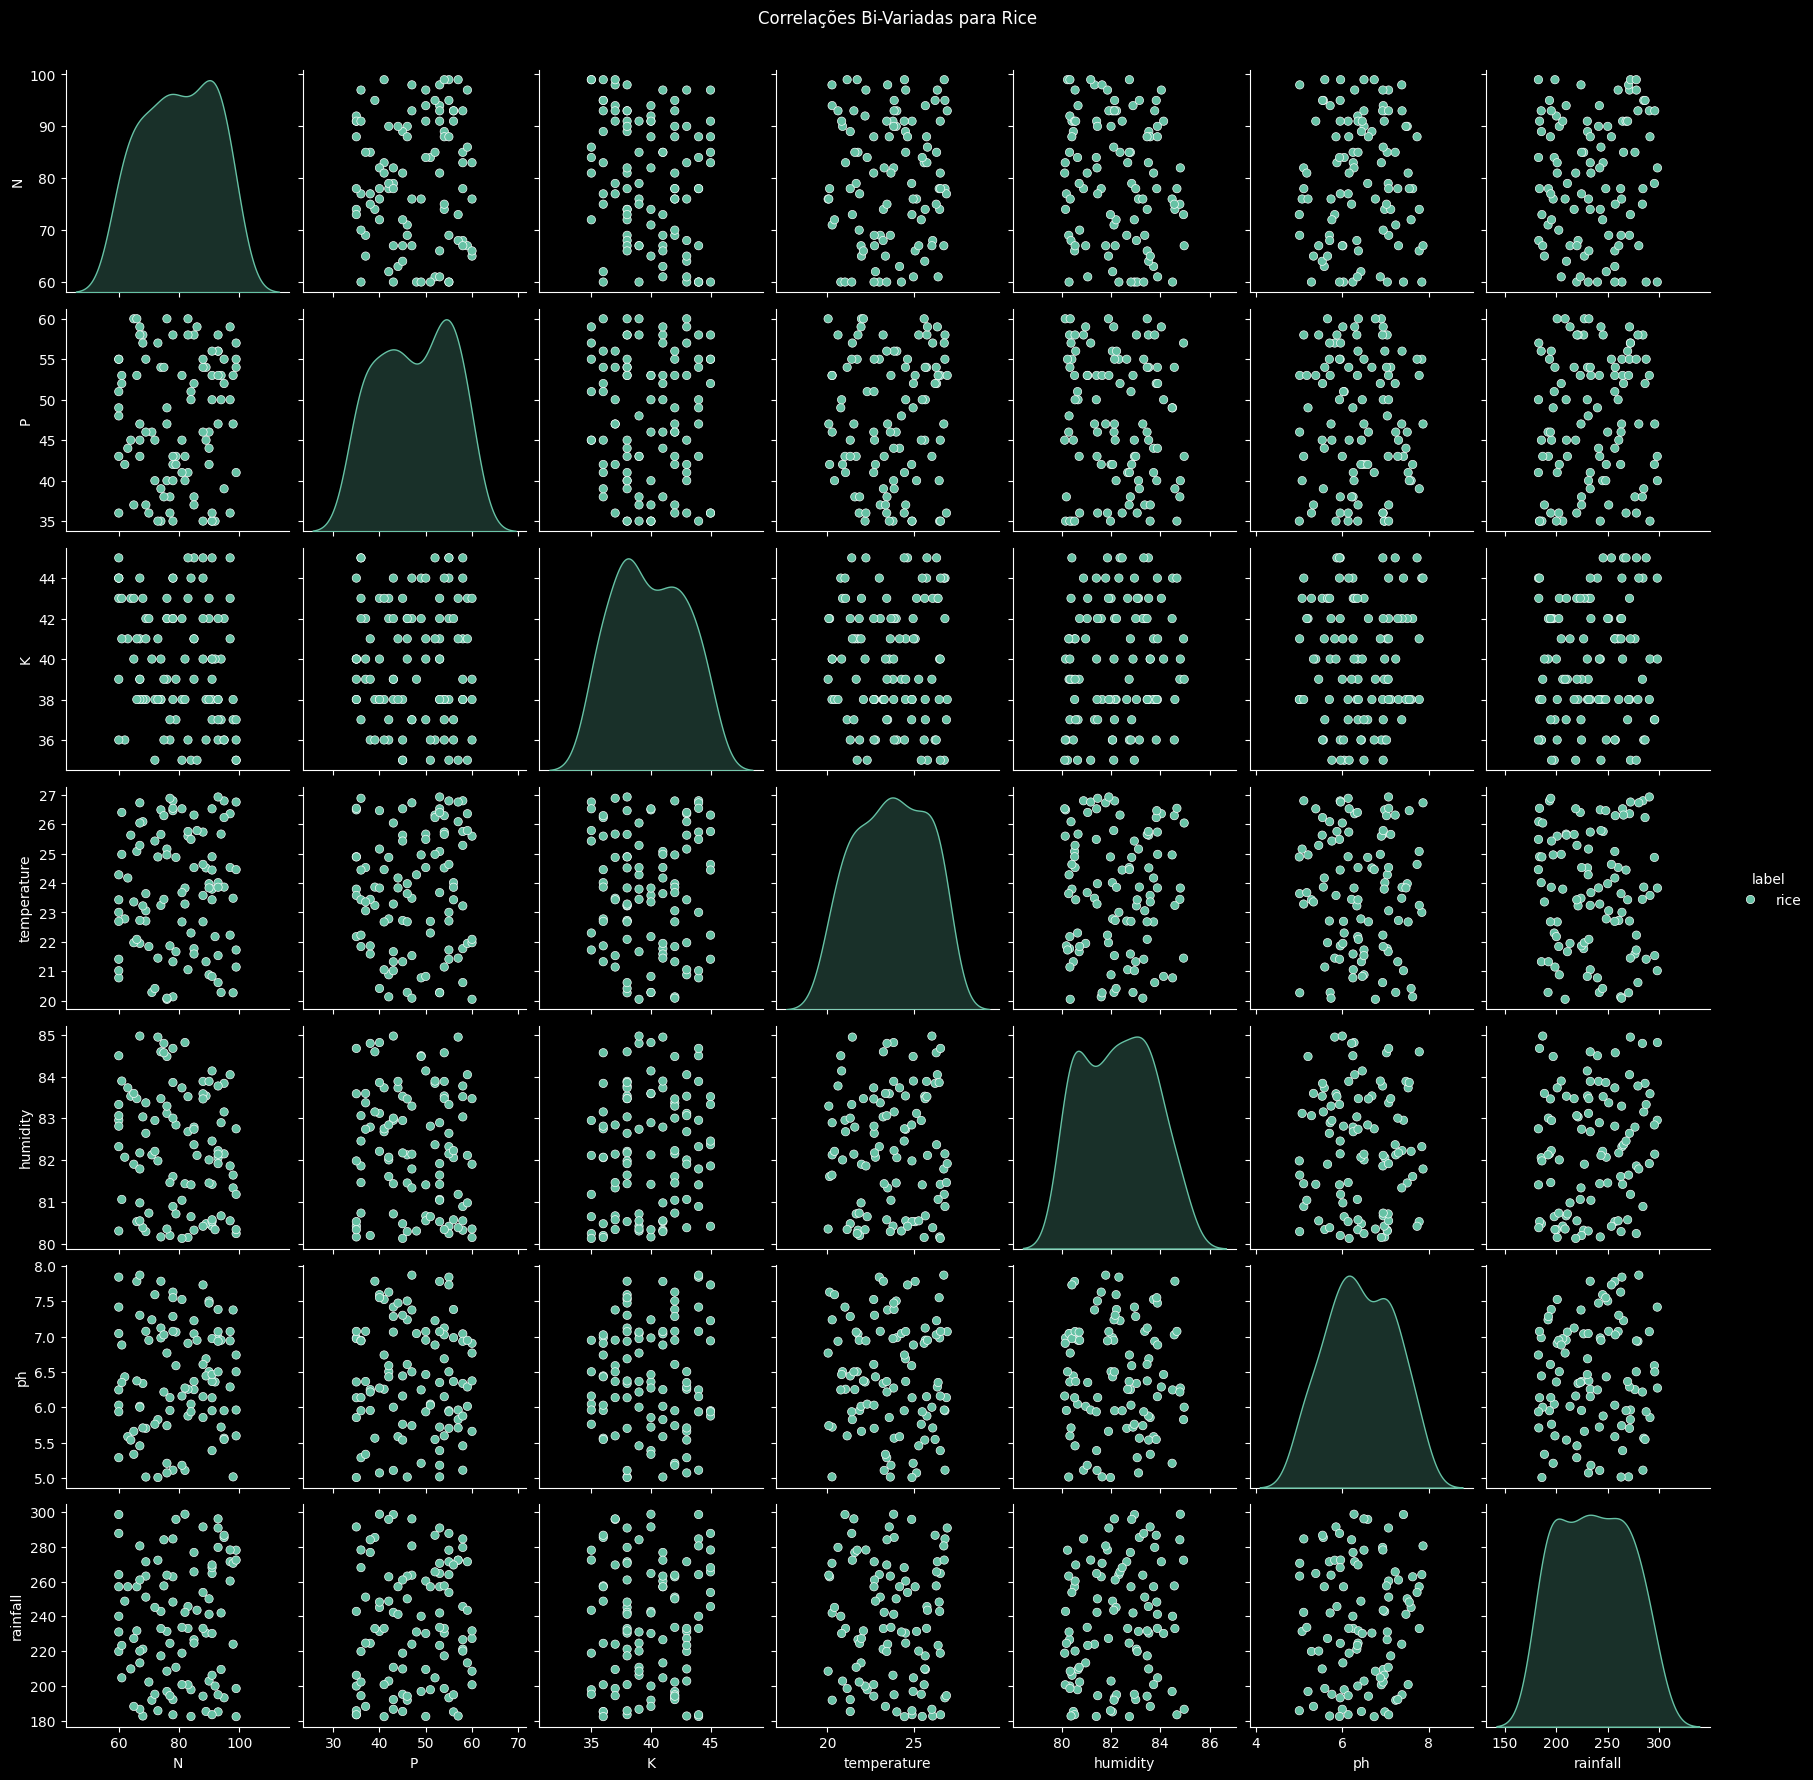

<Figure size 1000x600 with 0 Axes>

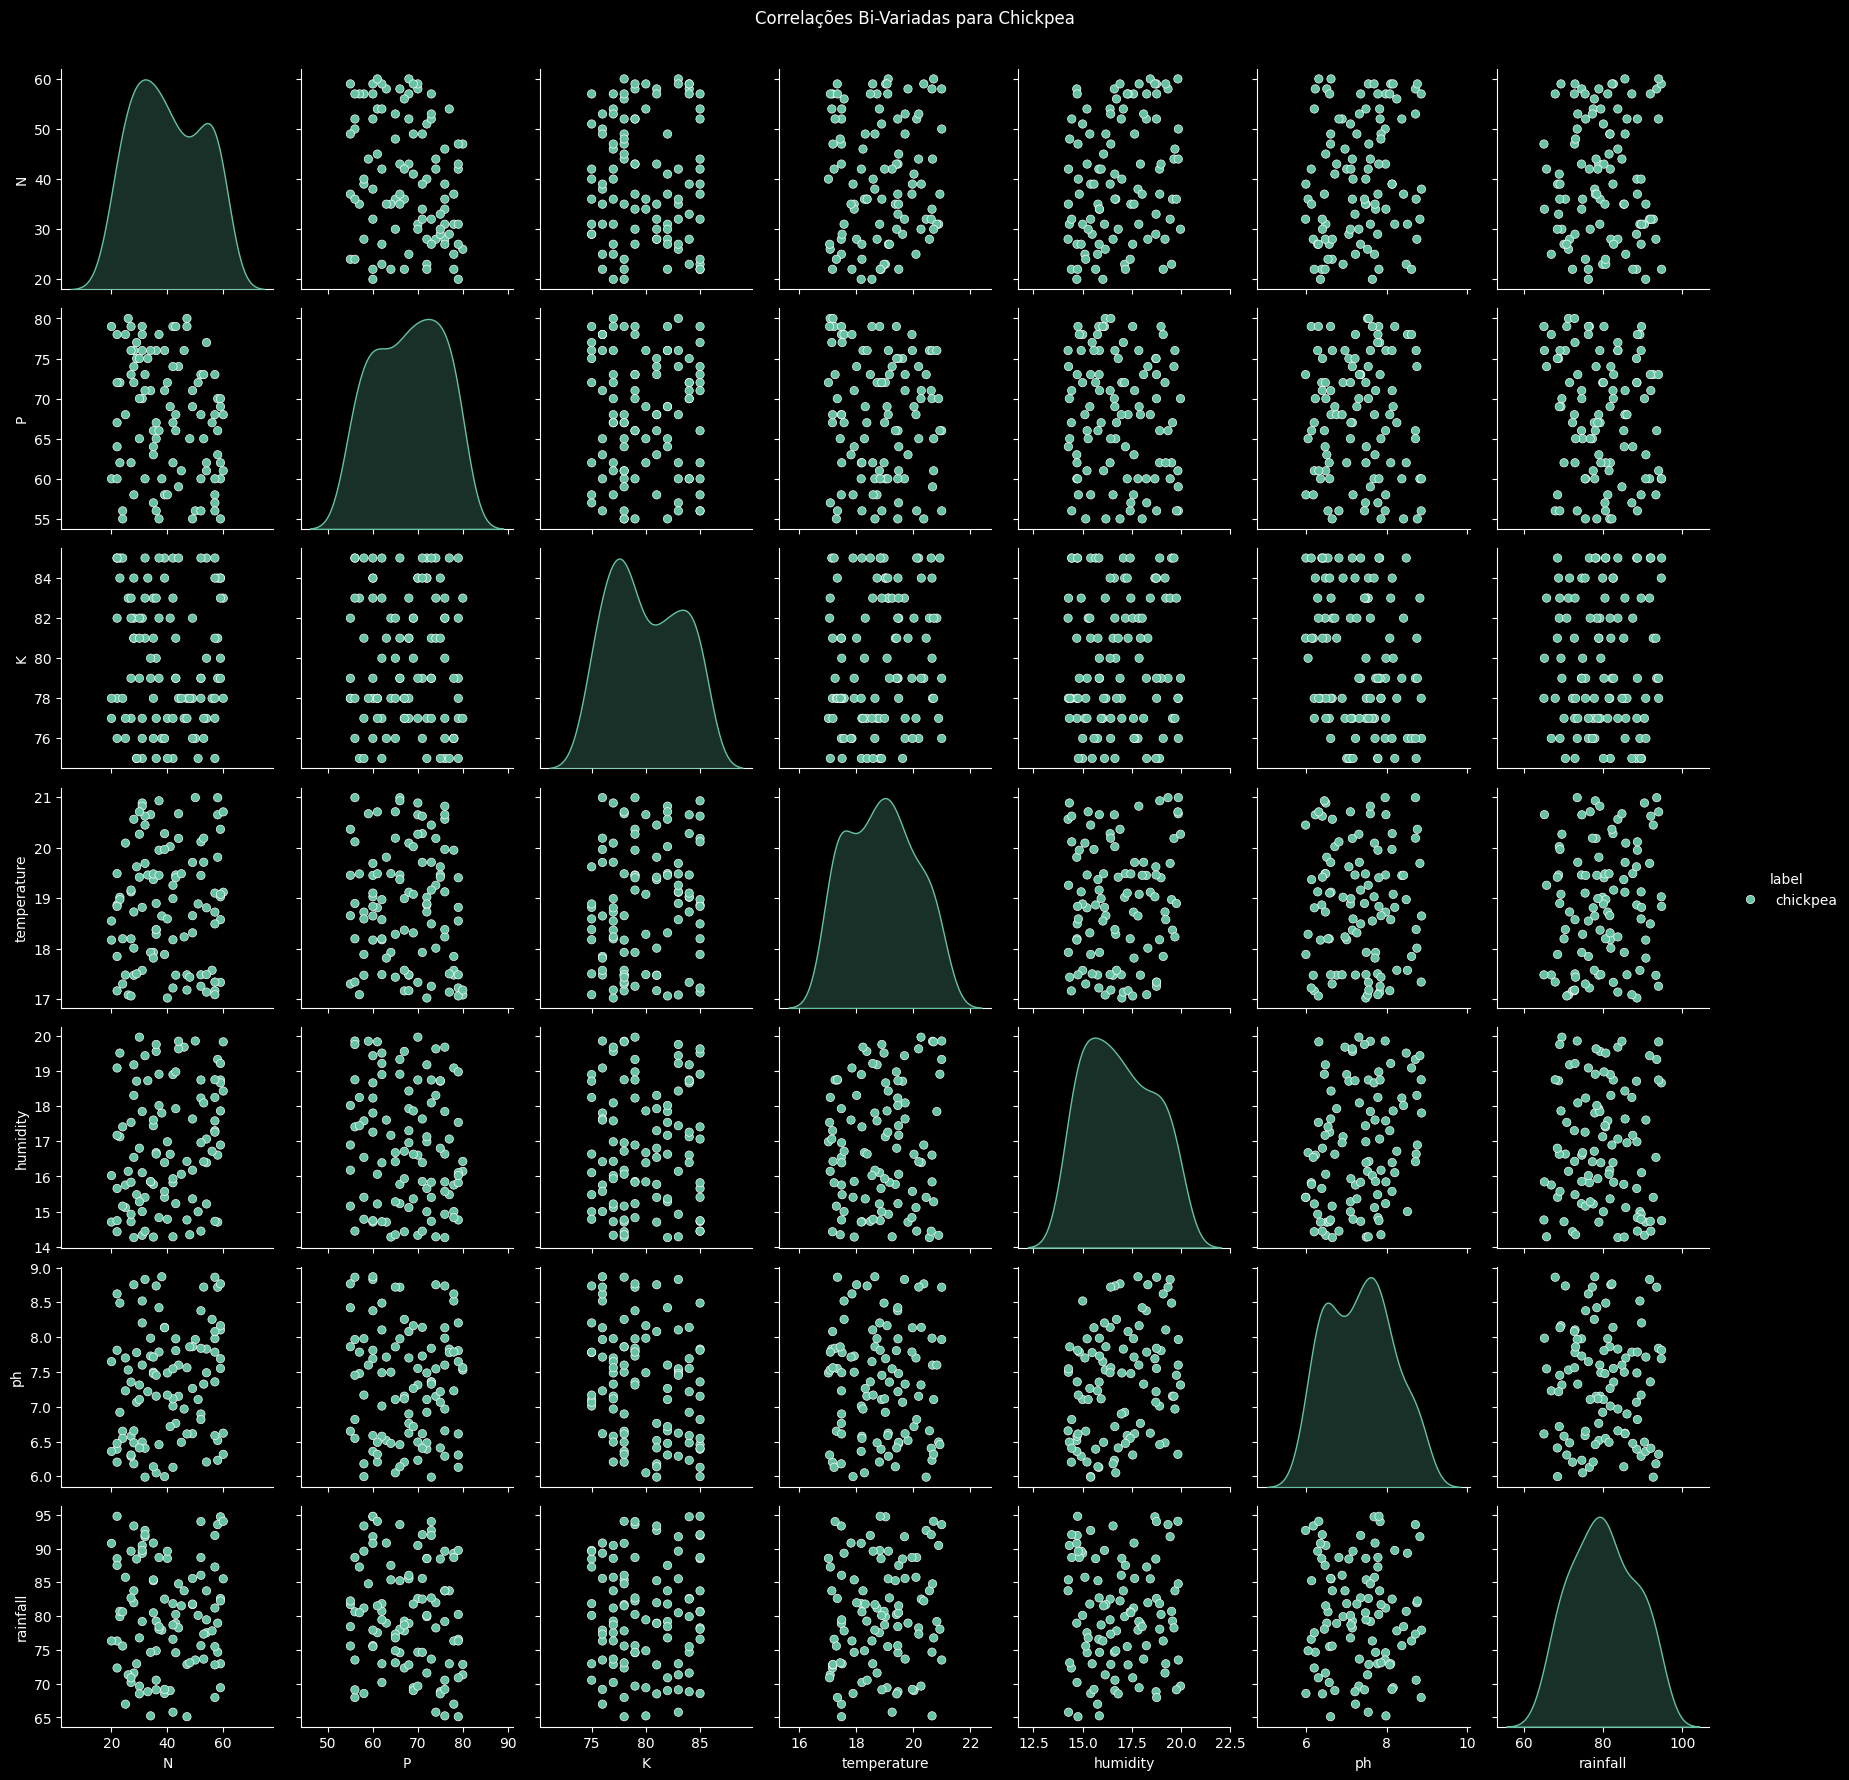

<Figure size 1000x600 with 0 Axes>

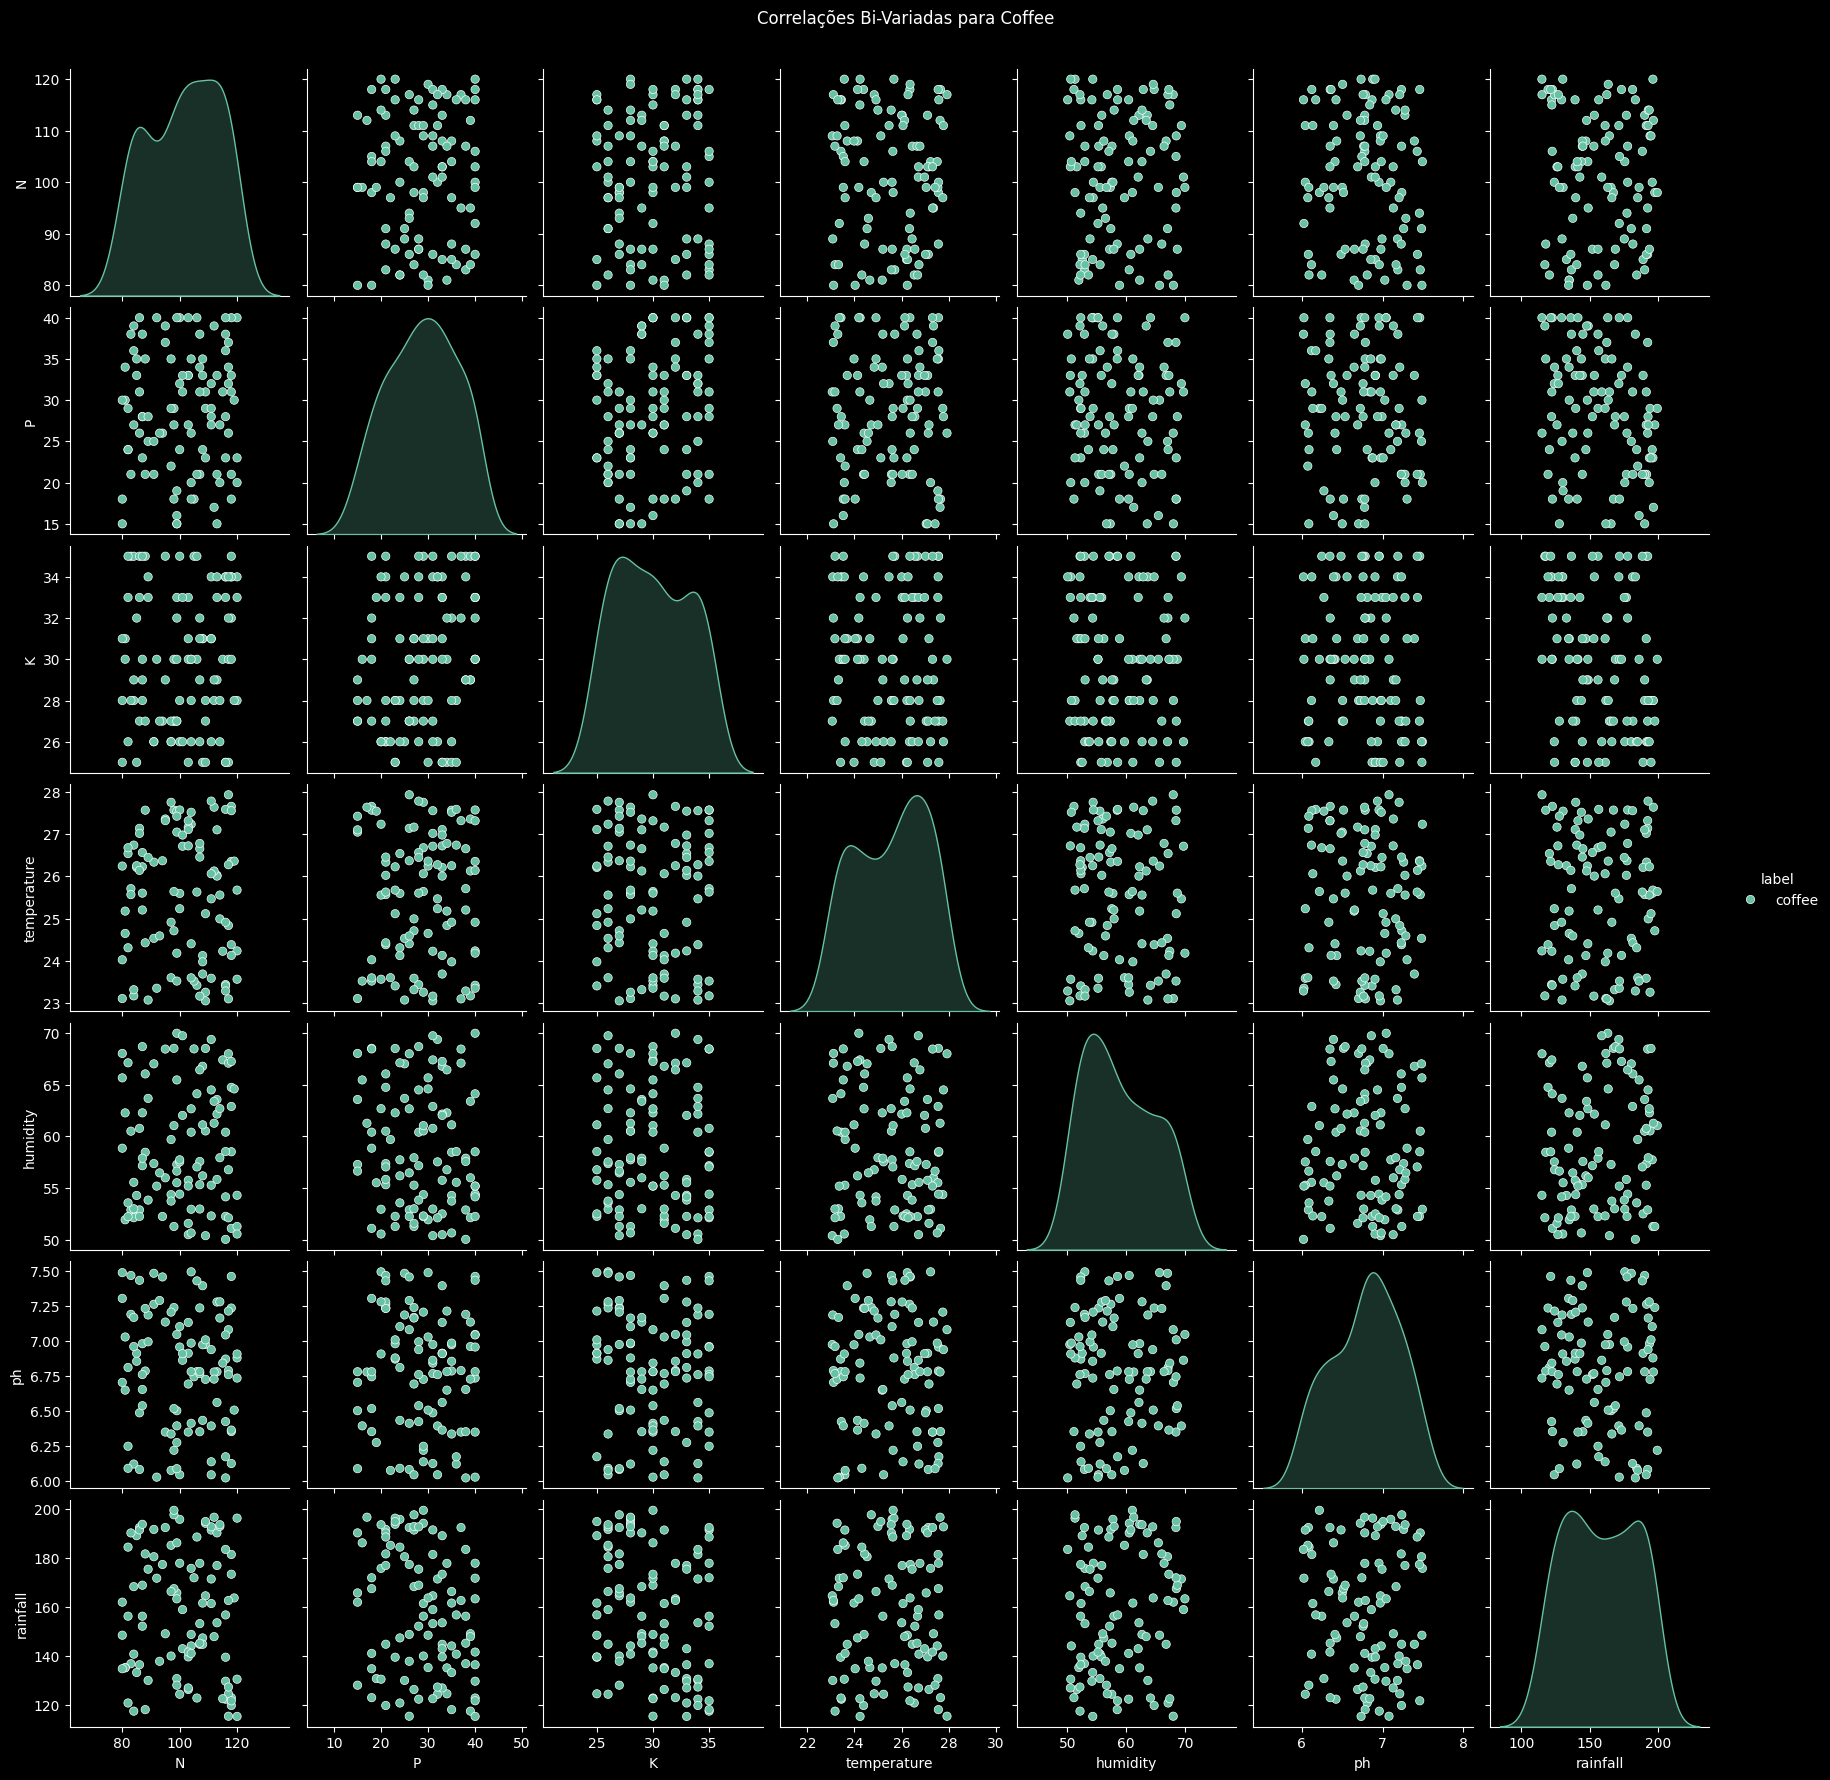

In [26]:
# Correlações bi-variadas para uma cultura específica para as culturas selecionadas
for cultura in culturas:
    if cultura not in culturas_selecionadas:
        continue
    data_cultura = df[df['label'] == cultura]
    plt.figure(figsize=(10, 6))
    sns.pairplot(data_cultura, hue='label', palette='Set2')
    plt.suptitle(f'Correlações Bi-Variadas para {cultura.capitalize()}', y=1.02)
    plt.show()

### 4.7. Gráficos de dispersão 3d de N, K e P para cada cultura agrícola

**Objetivo**: 
- Visualizar a relação entre as variáveis N, K e P para cada cultura agrícola
- Comparar a relação entre as variáveis para cada cultura agrícola

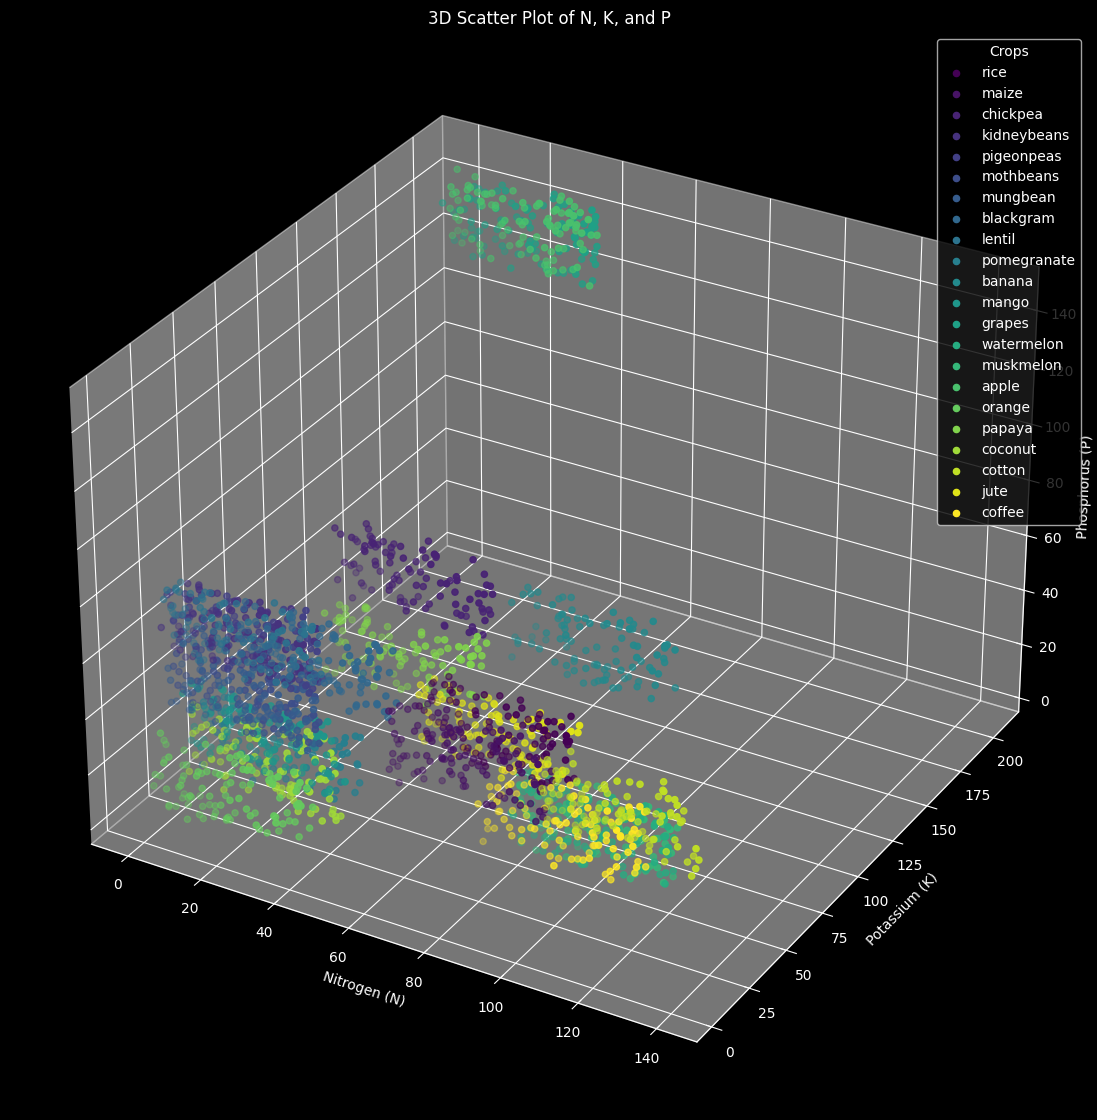

In [27]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Obter os labels únicos
labels = df['label'].unique()

# Criar um mapa de cores para os labels
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Scatter plot
for label, color in zip(labels, colors):
    subset = df[df['label'] == label]
    ax.scatter(subset['N'], subset['K'], subset['P'], label=label, color=color)

# Labels and title
ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Potassium (K)')
ax.set_zlabel('Phosphorus (P)')
ax.set_title('3D Scatter Plot of N, K, and P')

# Add legend
ax.legend(title="Crops")

plt.show()


## 5. Perfil Ideal

### Variável: Temperature
Neste gráfico de boxplot para a variável **Temperature**, observamos a distribuição dos valores de cada cultura ('rice', 'chickpea' e 'coffee'). A linha vermelha tracejada representa o perfil ideal, calculado como a média das médias entre as culturas selecionadas.

- **Rice**: Média = 23.69, Valores característicos distribuídos entre 20.05 e 26.93
- **Chickpea**: Média = 18.87, Valores característicos distribuídos entre 17.02 e 21.00
- **Coffee**: Média = 25.54, Valores característicos distribuídos entre 23.06 e 27.92
- O perfil ideal para Temperature é de aproximadamente 22.70.

### Variável: Humidity
Neste gráfico de boxplot para a variável **Humidity**, observamos a distribuição dos valores de cada cultura ('rice', 'chickpea' e 'coffee').

- **Rice**: Média = 82.27, Valores característicos distribuídos entre 80.12 e 84.97
- **Chickpea**: Média = 16.86, Valores característicos distribuídos entre 14.26 e 19.97
- **Coffee**: Média = 58.87, Valores característicos distribuídos entre 50.05 e 69.95
- O perfil ideal para Humidity é de aproximadamente 52.67.

### Variável: Ph
Neste gráfico de boxplot para a variável **Ph**, observamos a distribuição dos valores de cada cultura ('rice', 'chickpea' e 'coffee').

- **Rice**: Média = 6.43, Valores característicos distribuídos entre 5.01 e 7.87
- **Chickpea**: Média = 7.34, Valores característicos distribuídos entre 5.99 e 8.87
- **Coffee**: Média = 6.79, Valores característicos distribuídos entre 6.02 e 7.49
- O perfil ideal para Ph é de aproximadamente 6.85.

### Variável: Rainfall
Neste gráfico de boxplot para a variável **Rainfall**.

- **Rice**: Média = 236.18, Valores característicos distribuídos entre 182.56 e 298.56
- **Chickpea**: Média = 80.06, Valores característicos distribuídos entre 65.11 e 94.78
- **Coffee**: Média = 158.07, Valores característicos distribuídos entre 115.16 e 199.47
- O perfil ideal para Rainfall é de aproximadamente 158.10.

### Variável: N
Neste gráfico de boxplot para a variável **N**.

- **Rice**: Média = 79.89, Valores característicos distribuídos entre 60.00 e 99.00
- **Chickpea**: Média = 40.09, Valores característicos distribuídos entre 20.00 e 60.00
- **Coffee**: Média = 101.20, Valores característicos distribuídos entre 80.00 e 120.00
- O perfil ideal para N é de aproximadamente 73.73.

### Variável: P
Neste gráfico de boxplot para a variável **P**.

- **Rice**: Média = 47.58, Valores característicos distribuídos entre 35.00 e 60.00
- **Chickpea**: Média = 67.79, Valores característicos distribuídos entre 55.00 e 80.00
- **Coffee**: Média = 28.74, Valores característicos distribuídos entre 15.00 e 40.00
- O perfil ideal para P é de aproximadamente 48.04.

### Variável: K
Neste gráfico de boxplot para a variável **K**.

- **Rice**: Média = 39.87, Valores característicos distribuídos entre 35.00 e 45.00
- **Chickpea**: Média = 79.92, Valores característicos distribuídos entre 75.00 e 85.00
- **Coffee**: Média = 29.94, Valores característicos distribuídos entre 25.00 e 35.00
- O perfil ideal para K é de aproximadamente 49.91.


<Figure size 1200x800 with 0 Axes>

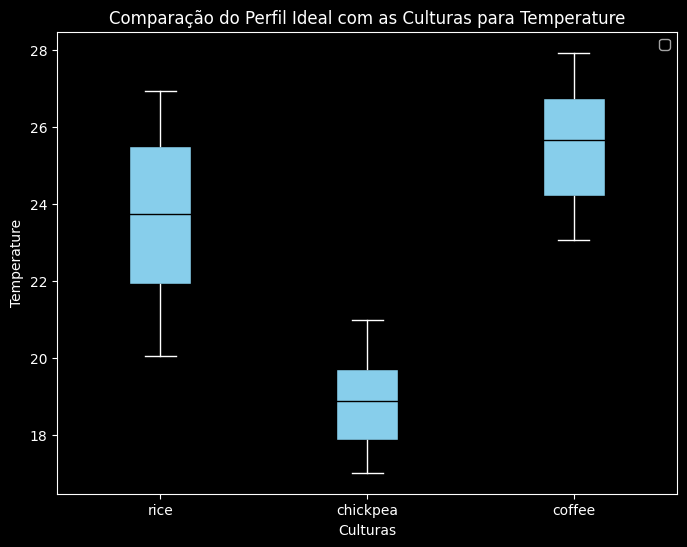

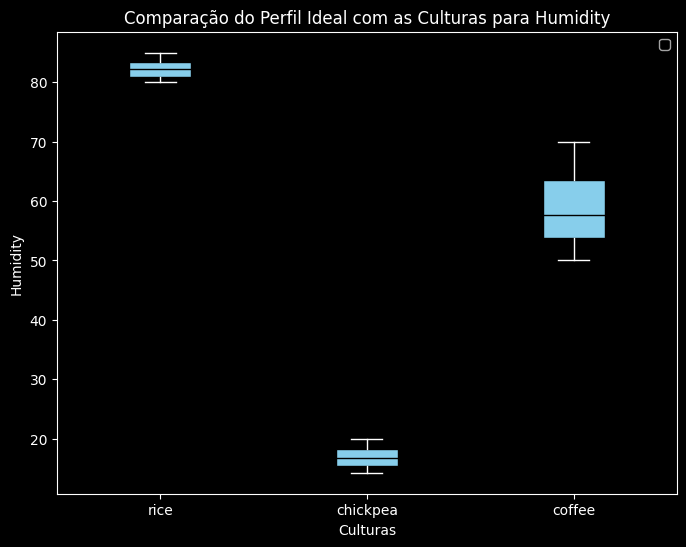

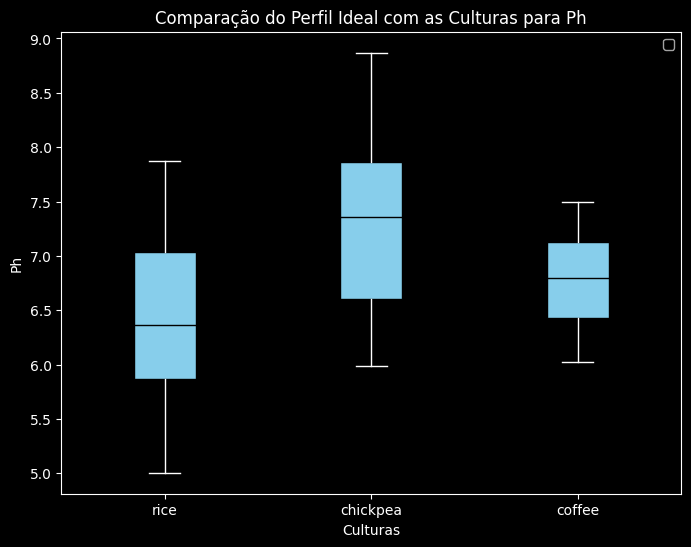

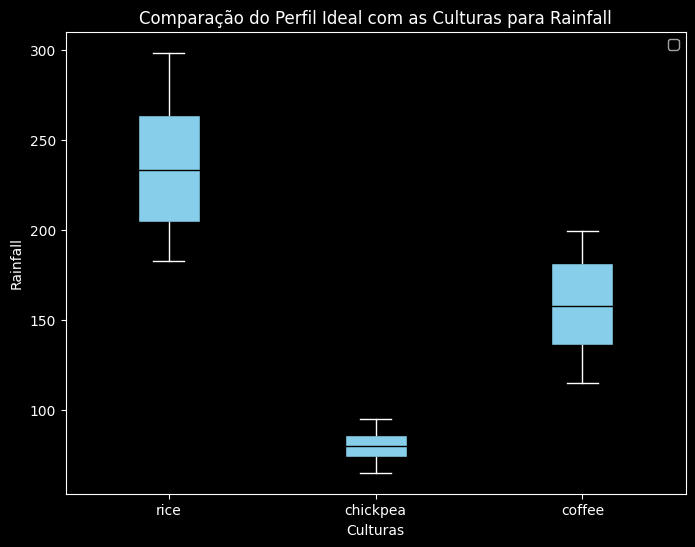

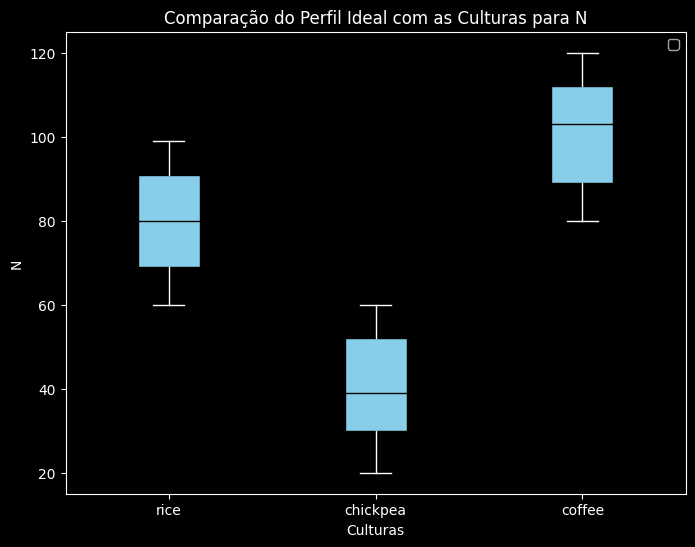

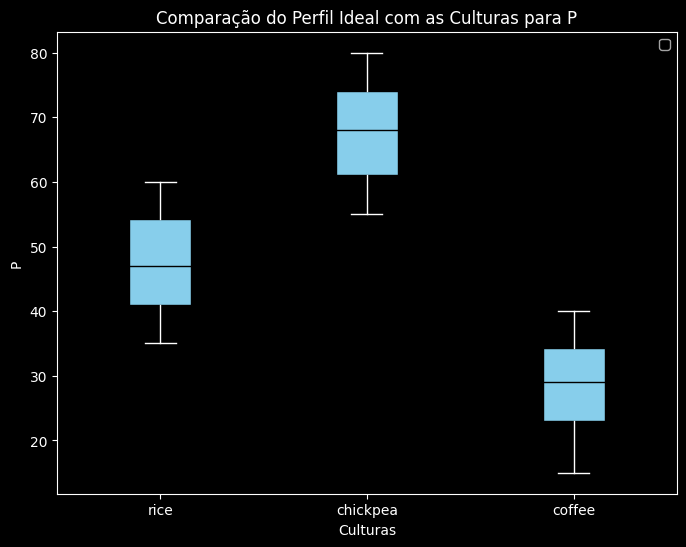

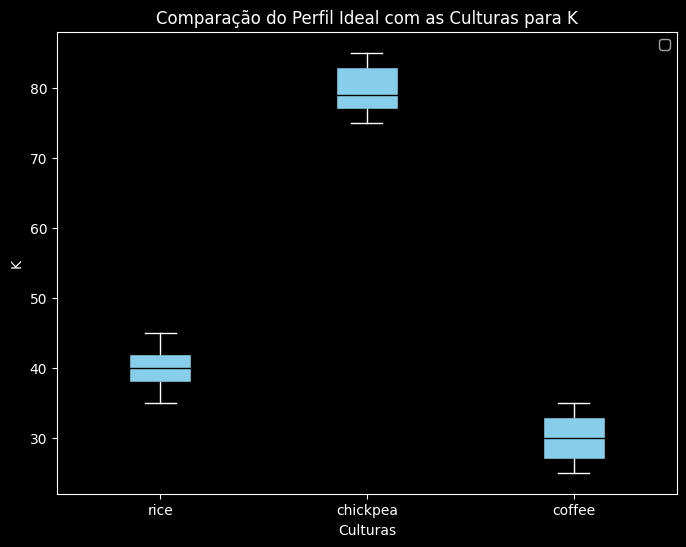

Médias por cultura:

          temperature   humidity        ph    rainfall       N      P      K
label                                                                       
chickpea    18.872847  16.860439  7.336957   80.058977   40.09  67.79  79.92
coffee      25.540477  58.869846  6.790308  158.066295  101.20  28.74  29.94
rice        23.689332  82.272822  6.425471  236.181114   79.89  47.58  39.87


In [28]:
# Filtrar para as culturas selecionadas
culturas_selecionadas = ['rice', 'chickpea', 'coffee']
df_filtered = df[df['label'].isin(culturas_selecionadas)]

# Calcular a média para cada cultura
medias_por_cultura = df_filtered.groupby('label')[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']].mean()

# Calcular o perfil ideal (média das médias entre as culturas)
perfil_ideal = medias_por_cultura.mean()

# Filtrar para as culturas selecionadas
culturas_selecionadas = ['rice', 'chickpea', 'coffee']
df_filtered = df[df['label'].isin(culturas_selecionadas)]

# Calcular a média para cada cultura
medias_por_cultura = df_filtered.groupby('label')[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']].mean()

# Calcular o perfil ideal (média das médias entre as culturas)
perfil_ideal = medias_por_cultura.mean()

# Gerar o gráfico com barras agrupadas e linha de perfil ideal
plt.figure(figsize=(12, 8))
bar_width = 0.2  # Largura das barras agrupadas

# Posições para cada grupo de barras em cada variável
positions = np.arange(len(medias_por_cultura.columns))

# Loop para gerar gráficos de boxplot para cada variável
for coluna in medias_por_cultura.columns:
    plt.figure(figsize=(8, 6))
    
    # Boxplot para cada cultura
    data_to_plot = [df_filtered[df_filtered['label'] == cultura][coluna] for cultura in culturas_selecionadas]
    plt.boxplot(data_to_plot, labels=culturas_selecionadas, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"), medianprops=dict(color="black"))
    
    # Configurações do gráfico
    plt.xlabel('Culturas')
    plt.ylabel(coluna.capitalize())
    plt.title(f'Comparação do Perfil Ideal com as Culturas para {coluna.capitalize()}')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

# Médias por cultura
print('Médias por cultura:\n')
print(medias_por_cultura)


## 6. Machine Learning

### 6.1. Definição do Problema

Objetivos:
- Desenvolver modelos preditivos de classificação de cultura agrícola baseando-se nos dados

### 6.2. Pré-processamento de Dados

O pré-processamento de dados é essencial para garantir que o modelo de Machine Learning receba dados de alta qualidade. Ele abrange desde a limpeza e transformação dos dados até a criação de novas features, passando pela identificação e tratamento de outliers. Cada uma dessas etapas contribui para a melhoria da precisão e eficácia do modelo.


#### 6.2.1. Limpeza de Dados

Tratamento de dados ausentes, duplicados e inconsistências.

- Não aplicável, pois não há valores ausentes, duplicatas ou inconsistências.

#### 6.2.2. Feature Engineering

##### 6.2.2.1. Criação de Novas Features

- Não aplicável

##### 6.2.2.2. Transformação de Variáveis Categóricas

In [29]:
# Gerar label-encoding para a variável categórica 'label'
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

df_labels = df[['label', 'label_encoded']]
df_labels


label  label_encoded
0       rice             20
1       rice             20
2       rice             20
3       rice             20
4       rice             20
...      ...            ...
2195  coffee              5
2196  coffee              5
2197  coffee              5
2198  coffee              5
2199  coffee              5

[2200 rows x 2 columns]

In [30]:
df_features = df.drop(columns=['label', 'label_encoded'], errors='ignore')
df_features

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

### 6.3. Divisão dos dados

In [31]:
# 20% dos dados para teste
df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=42)

# Print the number of rows in the training and test datasets
train_size = df_features_train.shape[0]
test_size = df_features_test.shape[0]
total_size = df.shape[0]

print(f"{train_size / total_size * 100:.0f}% das linhas no dataset de treino: {train_size}")
print(f"{test_size / total_size * 100:.0f}% das linhas no dataset de teste: {test_size}")

80% das linhas no dataset de treino: 1760
20% das linhas no dataset de teste: 440


In [32]:
# Visualizar features
df_features_train.head()

N   P   K  temperature   humidity        ph    rainfall
1656   17  16  14    16.396243  92.181519  6.625539  102.944161
752    37  79  19    27.543848  69.347863  7.143943   69.408782
892     7  73  25    27.521856  63.132153  7.288057   45.208411
1041  101  70  48    25.360592  75.031933  6.012697  116.553145
1179    0  17  30    35.474783  47.972305  6.279134   97.790725

In [33]:
# Visualizar labels
df_labels_train.head()

label  label_encoded
1656     orange             16
752   blackgram              2
892      lentil             10
1041     banana              1
1179      mango             12

### 6.4. Transformação de Dados

#### 6.4.1. Normalização

Isso é útil para algoritmos sensíveis à escala, como redes neurais.

A normalização dos dados pode melhorar o desempenho de alguns algoritmos de aprendizado de máquina categóricos, mas não de todos. Aqui está uma análise de como a normalização afeta cada um dos algoritmos:

Algoritmos afetados pela normalização:

- **KNN (k-Nearest Neighbors)**: KNN usa a distância euclidiana para calcular a similaridade entre os pontos de dados. Quando as variáveis ​​têm escalas diferentes, as variáveis ​​com valores maiores podem ter um impacto desproporcional na distância. A normalização garante que todas as variáveis ​​tenham o mesmo peso na medida da distância, o que pode melhorar a precisão do KNN.
- **Regressão Logística**: A regressão logística usa a função sigmóide, que é sensível à escala das variáveis ​​de entrada. Se algumas variáveis ​​tiverem valores muito maiores do que outras, elas podem dominar a função sigmóide, levando a uma convergência lenta ou mesmo a um desempenho ruim. A normalização pode ajudar a resolver esse problema, garantindo que todas as variáveis ​​tenham uma escala semelhante.
- **SVM (Máquina de Vetores de Suporte)**: SVM também usa a distância euclidiana para encontrar o hiperplano ótimo. Da mesma forma com o KNN, variáveis ​​com escalas diferentes podem influenciar a distância de forma desigual. A normalização pode ajudar a melhorar o desempenho do SVM, especialmente em conjuntos de dados com características de diferentes escalas.

Algoritmos menos afetados pela normalização:

- **Árvores de Decisão**: Árvores de decisão são menos sensíveis à escala dos dados, pois a divisão de nós é baseada na seleção da melhor variável e ponto de corte, independentemente de sua escala.
- **Florestas Aleatórias**: Como as árvores de decisão, as florestas aleatórias são relativamente insensíveis à normalização, pois são compostas por várias árvores de decisão, que são treinadas em diferentes subconjuntos de dados.

In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features data
scaler.fit(df_features_train)

# Transform the features train data
scaled_train = scaler.transform(df_features_train)
# Convert the scaled data back to a DataFrame
df_scaled_train = pd.DataFrame(scaled_train, columns=df_features.columns)

# Transform the features test data
scaled_test = scaler.transform(df_features_test)
# Convert the scaled data back to a DataFrame
df_scaled_test = pd.DataFrame(scaled_test, columns=df_features.columns)

# Display the first few rows of the scaled data
df_scaled_train

N         P      K  temperature  humidity        ph  rainfall
0     0.121429  0.078571  0.045     0.217234  0.908990  0.485322  0.296852
1     0.264286  0.528571  0.070     0.537110  0.642579  0.565941  0.176308
2     0.050000  0.485714  0.100     0.536479  0.570058  0.588352  0.089318
3     0.721429  0.464286  0.215     0.474462  0.708898  0.390017  0.345770
4     0.000000  0.085714  0.125     0.764684  0.393181  0.431452  0.278327
...        ...       ...    ...          ...       ...       ...       ...
1755  0.071429  0.000000  0.000     0.355451  0.899329  0.670741  0.332938
1756  0.771429  0.635714  0.210     0.531809  0.819906  0.448294  0.253244
1757  0.078571  0.221429  0.130     0.547921  0.437603  0.461981  0.287198
1758  0.078571  0.850000  0.995     0.132116  0.767637  0.444205  0.183467
1759  0.228571  0.521429  0.085     0.434583  0.560997  0.544650  0.118796

[1760 rows x 7 columns]

#### 6.4.2. Padronização

- Não aplicável

### 6.5. Treinamento de modelos

#### 6.5.1. Árvore de Decisão

Uma técnica de aprendizado supervisionado que cria uma estrutura hierárquica para classificação e regressão, baseada em decisões sequenciais.

**Funcionamento:**
- **Seleção da melhor divisão**: Identifica a variável que melhor divide os dados em subconjuntos homogêneos
- **Divisão recursiva**: Divide os dados em subconjuntos, formando novos nós
- **Classificação**: Classifica novos exemplos percorrendo a árvore da raiz até as folhas

**Vantagens:**
- Fácil interpretação
- Flexibilidade para diferentes tipos de dados
- Lida bem com variáveis numéricas e categóricas

**Desvantagens:**
- Tendência a overfitting
- Instabilidade com pequenas variações nos dados
- Viés para variáveis com mais categorias

In [35]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

# Prever as classes para o conjunto de teste
dt_pred = dt.predict(df_scaled_test)

# Calcular a acurácia
accuracy = accuracy_score(df_labels_test['label_encoded'], dt_pred)
print(f'Acurácia do modelo Decision Tree: {accuracy * 100:.2f}%')

# Gerar um relatório de classificação
# print(classification_report(df_test_label, dt_pred))

Acurácia do modelo Decision Tree: 97.27%


#### 6.5.2. Floresta Aleatória

Uma evolução da árvore de decisão que combina múltiplas árvores para melhorar a capacidade preditiva.

**Funcionamento:**
- **Criação de múltiplas árvores**: Treina várias árvores com subconjuntos aleatórios dos dados
- **Agregação**: Combina as previsões de todas as árvores por votação ou média

**Vantagens:**
- Alta precisão
- Robustez contra overfitting
- Boa performance com dados de alta dimensionalidade

**Desvantagens:**
- Menor interpretabilidade
- Alto custo computacional

In [36]:
rf = RandomForestClassifier(n_estimators=25, max_depth=10)
rf.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

rf_pred = rf.predict(df_scaled_test)

# Calcular a acurácia
accuracy = accuracy_score(df_labels_test['label_encoded'], rf_pred)

print(f"Acurácia do modelo Random Forest: {accuracy * 100:.2f}%")
# print(classification_report(df_test_label, rf_pred))


Acurácia do modelo Random Forest: 99.55%


#### 6.5.3. Regressão Logística

Algoritmo de aprendizado supervisionado que pode ser adaptado para classificação multiclasse através da abordagem "one-vs-all" ou "one-vs-one".

**Funcionamento:**
- **Combinação linear**: Combina características com seus pesos para cada classe
- **Função logística**: Aplica função softmax para obter probabilidades para todas as classes
- **Classificação**: Atribui o exemplo à classe com maior probabilidade prevista

**Vantagens:**
- Alta interpretabilidade das probabilidades por classe
- Eficiente para grandes datasets
- Robusta com regularização
- Fornece probabilidades bem calibradas
- Fácil de atualizar com novos dados

**Desvantagens:**
- Performance pode ser inferior a outros métodos em relações não-lineares complexas
- Sensível à multicolinearidade entre variáveis preditoras
- Pode requerer mais recursos computacionais conforme aumenta o número de classes
- Necessita de uma quantidade significativa de dados por classe
- Assume independência entre as classes

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

lr_pred = lr.predict(df_scaled_test)

print(f"Acurácia do modelo Logistic Regression: {accuracy_score(df_labels_test['label_encoded'], lr_pred) * 100:.2f}%")
# print(classification_report(df_test_label, lr_pred))


Acurácia do modelo Logistic Regression: 91.82%


#### 6.5.4. K-Nearest Neighbors (KNN)

Algoritmo baseado na proximidade entre pontos para classificação.

**Funcionamento:**
- **Cálculo de distância**: Mede a distância entre o novo ponto e todos os pontos existentes
- **Seleção de vizinhos**: Identifica os K vizinhos mais próximos
- **Votação**: Classifica baseado na maioria dos vizinhos

**Vantagens:**
- Simples de implementar
- Não requer treinamento
- Adaptável a novos dados

**Desvantagens:**
- Computacionalmente intensivo para grandes datasets
- Sensível à escolha do valor K
- Requer normalização dos dados


In [38]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

knn_pred = knn.predict(df_scaled_test)

print(f"Acurácia do modelo KNN: {accuracy_score(df_labels_test['label_encoded'], knn_pred) * 100:.2f}%")
# print(classification_report(df_test_label, knn_pred))


Acurácia do modelo KNN: 95.91%


#### 6.5.5. Support Vector Machine (SVM)

Algoritmo que busca o melhor hiperplano de separação entre classes.

**Funcionamento:**
- **Mapeamento dimensional**: Transforma dados para dimensões superiores
- **Otimização**: Encontra o hiperplano com maior margem entre classes
- **Classificação**: Determina classes pela posição relativa ao hiperplano

**Vantagens:**
- Eficaz em alta dimensionalidade
- Robusto a outliers
- Versátil com diferentes kernels

**Desvantagens:**
- Complexidade na escolha de parâmetros
- Alto custo computacional para grandes datasets

In [39]:
svm = SVC()
svm.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

svm_pred = svm.predict(df_scaled_test)

print(f"Acurácia do modelo SVM: {accuracy_score(df_labels_test['label_encoded'], svm_pred) * 100:.2f}%")
# print(classification_report(df_test_label, svm_pred))


Acurácia do modelo SVM: 96.82%


### 6.6. Avaliação dos modelos

#### 6.6.1. Definição das Métricas de Avaliação

**Objetivo**:  
Avaliar a qualidade dos modelos de classificação. 

**Tipos de avaliação**:  
- **Validação cruzada** nos dados de treinamento (somente acurácia)  
- **Avaliação de métricas** nos dados de teste  

**O que é a validação cruzada?**  
A validação cruzada é uma técnica de avaliação que consiste em dividir o conjunto de dados de treinamento em múltiplos subconjuntos (ou *folds*). O modelo é treinado em alguns desses subconjuntos e validado nos restantes, repetindo o processo várias vezes. O objetivo é garantir que o modelo generalize bem para dados não vistos, reduzindo o risco de overfitting e garantindo uma avaliação robusta. A métrica de interesse (neste caso, a acurácia) é calculada para cada iteração e, ao final, uma média das métricas obtidas é utilizada como estimativa da performance do modelo.

**Métricas avaliadas**:  
- **Acurácia**:  
  Proporção de predições corretas em relação ao total de predições. É útil quando as classes estão balanceadas.  
  *Exemplo de caso de uso*: em um sistema de reconhecimento de imagens para classificar cães e gatos, a acurácia seria uma métrica adequada se o conjunto de dados de treinamento contivesse um número similar de imagens de cães e gatos.

- **Precisão**:  
  Proporção de verdadeiros positivos em relação a todos os positivos previstos. É importante em cenários onde os falsos positivos têm um custo elevado.  
  *Exemplo de caso de uso*: em um sistema de detecção de fraudes em transações bancárias, um falso positivo (classificar uma transação legítima como fraudulenta) pode resultar em bloqueio indevido da conta do cliente e perda de confiança no sistema. Nesses casos, priorizar a precisão é fundamental.

- **Recall** (ou Sensibilidade):  
  Proporção de verdadeiros positivos em relação a todos os positivos reais. É crucial em situações onde os falsos negativos têm um custo maior.  
  *Exemplo de caso de uso*:  em um sistema de diagnóstico médico para detecção de câncer, um falso negativo (classificar um paciente com câncer como saudável) pode ter consequências graves, pois atrasa o tratamento e impacta as chances de recuperação. Nesses casos, a revocação é a métrica mais importante.

- **F1-Score**:  
  Média harmônica entre precisão e recall. É uma métrica útil quando há um desequilíbrio entre as classes ou quando é necessário um equilíbrio entre precisão e recall.  
  *Exemplo de caso de uso*: em um sistema de recomendação de produtos para clientes, o F1-Score seria uma métrica adequada, pois busca equilibrar a relevância das recomendações (precisão) com a cobertura dos produtos que o cliente pode ter interesse (revocação).
 

**Classification Report**:  
O *classification report* é uma função da biblioteca scikit-learn que fornece uma visão detalhada das principais métricas de avaliação de um modelo de classificação. Ele inclui a precisão, recall, F1-score e o suporte (número de ocorrências de cada classe no conjunto de teste) para cada classe.  

O relatório ajuda a identificar o desempenho do modelo para cada classe individualmente, fornecendo insights sobre quais classes estão sendo bem ou mal classificadas. Essa análise detalhada é essencial para ajustar o modelo e melhorar sua performance em classes específicas.

**Exemplo de saída do *classification report***:  
```PlainText
               precision    recall  f1-score   support

            0       0.90      0.85      0.88       100
            1       0.82      0.89      0.85        80

     accuracy                           0.86       180
    macro avg       0.86      0.87      0.86       180
 weighted avg       0.87      0.86      0.86       180
```

Nesse exemplo, temos um modelo que apresenta boa precisão e recall para ambas as classes (0 e 1), com um F1-score equilibrado, o que sugere que o modelo é eficiente na classificação dos dados de teste.

In [40]:
def evaluate_model(model, model_name):
    print("Evaluating model: ", model_name)
    # Cross-validation metrics
    cv_scores = cross_val_score(
        model, df_scaled_train, df_labels_train["label_encoded"], cv=5
    )
    print(
        f"\nCross-validated accuracy: {np.mean(cv_scores) *100:.2f}% ± {np.std(cv_scores) *100:.2f}%"
    )

    # Test set accuracy
    predictions = model.predict(df_scaled_test)
    
    accuracy = accuracy_score(df_labels_test["label_encoded"], predictions)
    precision = precision_score(df_labels_test["label_encoded"], predictions, average='weighted')
    recall = recall_score(df_labels_test["label_encoded"], predictions, average='weighted')
    f1 = f1_score(df_labels_test["label_encoded"], predictions, average='weighted')
    
    print(f"\nTest set accuracy: {accuracy * 100:.2f}%")
    print(f"Test set precision: {precision * 100:.2f}%")
    print(f"Test set recall: {recall * 100:.2f}%")
    print(f"Test set F1 score: {f1 * 100:.2f}%")
    
    print("\nClassification report")
    print(
        classification_report(
            df_labels_test["label_encoded"],
            predictions,
            target_names=le.inverse_transform(
                np.unique(df_labels_test["label_encoded"])
            ),
        )
    )


#### 6.6.2. Árvore de Decisão

In [41]:
evaluate_model(dt, 'Decision Tree')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
predicted_label = dt.predict(new_sample)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Decision Tree

Cross-validated accuracy: 94.94% ± 3.19%

Test set accuracy: 97.27%
Test set precision: 97.58%
Test set recall: 97.27%
Test set F1 score: 97.28%

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.90      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.91      0.83      0.

#### 6.6.3. Floresta aleatória

In [42]:
evaluate_model(rf, 'Random Forest')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = rf.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Random Forest

Cross-validated accuracy: 99.43% ± 0.51%

Test set accuracy: 99.55%
Test set precision: 99.58%
Test set recall: 99.55%
Test set F1 score: 99.54%

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.

#### 6.6.4. Regressão Logística

In [43]:
evaluate_model(lr, 'Logistic Regression')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = lr.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')

Evaluating model:  Logistic Regression

Cross-validated accuracy: 93.18% ± 1.11%

Test set accuracy: 91.82%
Test set precision: 93.44%
Test set recall: 91.82%
Test set F1 score: 91.72%

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.85      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.84      0.70      0.76        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       0.66      1.00      0.79        19
   mothbeans       1.00      0.54  

#### 6.6.5. K-Nearest Neighbors (KNN)

In [44]:
evaluate_model(knn, 'K-Nearest Neighbors (KNN)')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = knn.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')

Evaluating model:  K-Nearest Neighbors (KNN)

Cross-validated accuracy: 98.07% ± 0.45%

Test set accuracy: 95.91%
Test set precision: 96.36%
Test set recall: 95.91%
Test set F1 score: 95.90%

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.90      0.95        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      

#### 6.6.6. Support Vector Machine (SVM)

In [45]:
evaluate_model(svm, 'Support Vector Machine (SVM)')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = svm.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Support Vector Machine (SVM)

Cross-validated accuracy: 98.41% ± 0.56%

Test set accuracy: 96.82%
Test set precision: 97.30%
Test set recall: 96.82%
Test set F1 score: 96.82%

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00   

## 7. Conclusão

Este projeto faz parte de uma atividade acadêmica que explora o uso de **Inteligência Artificial** na agricultura. O objetivo é classificar culturas agrícolas (ex.: arroz, grão-de-bico, café) com base em variáveis de solo e clima, encontrando o "perfil ideal" de condições ambientais para cada cultura.

### Objetivos
- Desenvolver um modelo preditivo para classificar culturas com base em fatores como temperatura, umidade, pH do solo e nutrientes (N, P, K).
- Identificar o perfil ideal de solo/clima para cada cultura selecionada.
- Comparar os perfis das culturas para entender preferências específicas (ex.: maior umidade, menor fósforo).

### Metodologia
- **Análise Exploratório e Descritiva**: Limpeza e análise dos dados para identificar padrões, incluindo gráficos de dispersão, histogramas e boxplots.
- **Modelagem Preditiva**: Teste de diferentes algoritmos de classificação (Random Forest, Decision Tree, Logistic Regression, KNN, SVM).
- **Avaliação de Desempenho**: Uso de métricas como acurácia, F1-score e validação cruzada para avaliar os modelos.

### Resultados
- O modelo **Random Forest** obteve a melhor precisão, acima de 99% na classificação das culturas, mostrando-se o mais adequado para o problema.
- O perfil ideal para cada cultura foi identificado, permitindo comparações entre as culturas e insights sobre suas preferências ambientais.

### Conclusão
O projeto demonstra o potencial da IA para otimizar práticas agrícolas, auxiliando agricultores e agrônomos na escolha de culturas para condições ambientais específicas. Trabalhos futuros podem incluir o uso de redes neurais e integração de dados climáticos de longo prazo para melhorar ainda mais as previsões.

Este projeto apresenta uma metodologia robusta que pode auxiliar no avanço da agricultura de precisão, promovendo uma agricultura mais sustentável e eficiente.

